In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# from google.colab import drive
# import os

# # Mount Google Drive
# drive.mount('/content/drive')

# # Define the dataset storage path in Google Drive
# dataset_path = "/content/drive/MyDrive/UCSD_Anomaly_Dataset.tar.gz"
# extract_path = "/content/drive/MyDrive/UCSD_Anomaly_Dataset/"

# # Download the dataset (only if it does not already exist)
# if not os.path.exists(dataset_path):
#     !wget -c "http://www.svcl.ucsd.edu/projects/anomaly/UCSD_Anomaly_Dataset.tar.gz" -O "{dataset_path}"

# # Extract the dataset directly in Google Drive
# !mkdir -p "{extract_path}"
# !tar -xzf "{dataset_path}" -C "{extract_path}"

# # Remove the compressed file to save space
# !rm "{dataset_path}"

# print("✅ Dataset downloaded and saved to Google Drive!")

In [ ]:
# import os

# folder_path = '/content/drive/MyDrive/UCSD_Anomaly_Dataset'

# # استفاده از دستور سیستم برای حذف سریع‌تر
# os.system(f'rm -rf "{folder_path}"')

# print("✅ Folder and its contents have been deleted.")

In [ ]:
# !wget -c "http://www.svcl.ucsd.edu/projects/anomaly/UCSD_Anomaly_Dataset.tar.gz" -O "/content/drive/MyDrive/UCSD_Anomaly_Dataset.tar.gz"


In [ ]:
import os
import cv2
from google.colab import drive

# ✅ Mount Google Drive
drive.mount('/content/drive')

# ✅ Dataset path
DATASET_PATH = "/content/drive/MyDrive/UCSD_Anomaly_Dataset/UCSD_Anomaly_Dataset.v1p2/UCSDped2"

# ✅ Define abnormal frame ranges (Test001 to Test012 only)
TestVideoFile = {
    "Test001": range(61, 181),
    "Test002": range(95, 181),
    "Test003": range(1, 147),
    "Test004": range(31, 181),
    "Test005": range(1, 130),
    "Test006": range(1, 160),
    "Test007": range(46, 181),
    "Test008": range(1, 181),
    "Test009": range(1, 121),
    "Test010": range(1, 151),
    "Test011": range(1, 181),
    "Test012": range(88, 181)
}

def count_frames(dataset_type):
    path = os.path.join(DATASET_PATH, dataset_type)
    normal_count = 0
    anomaly_count = 0

    for folder in sorted(os.listdir(path)):
        if folder not in TestVideoFile and dataset_type == "Test":
            continue  # فقط تست‌هایی که در TestVideoFile هستند
        folder_path = os.path.join(path, folder)
        if os.path.isdir(folder_path) and not folder.endswith("_gt"):
            for filename in sorted(os.listdir(folder_path)):
                if filename.lower().endswith(('.jpg', '.png', '.jpeg', '.bmp', '.tif')):
                    try:
                        frame_idx = int(os.path.splitext(filename)[0])
                        if dataset_type == "Test":
                            anomaly_range = TestVideoFile.get(folder, [])
                            if frame_idx in anomaly_range:
                                anomaly_count += 1
                            else:
                                normal_count += 1
                        else:
                            normal_count += 1
                    except ValueError:
                        continue
    return normal_count, anomaly_count

# ✅ Count frames
train_normal, train_abnormal = count_frames("Train")
test_normal, test_abnormal = count_frames("Test")

# ✅ Display counts
print(f"Train Set → Normal: {train_normal}, Anomalous: {train_abnormal} (should be 0)")
print(f"Test Set  → Normal: {test_normal}, Anomalous: {test_abnormal}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Train Set → Normal: 2550, Anomalous: 0 (should be 0)
Test Set  → Normal: 362, Anomalous: 1648


In [ ]:
import os
import cv2
import shutil

# ✅ Paths for Train and Test directories
TRAIN_PATH = os.path.join(DATASET_PATH, "Train")
TEST_PATH = os.path.join(DATASET_PATH, "Test")

# ✅ Output directories for extracted frames
NORMAL_DIR = "/content/All_Normal_Frames"
ANOMALY_DIR = "/content/All_Anomaly_Frames"

# ✅ Create output directories if they don't exist
os.makedirs(NORMAL_DIR, exist_ok=True)
os.makedirs(ANOMALY_DIR, exist_ok=True)

# ✅ Frame counters
normal_count = 0
anomaly_count = 0

# ✅ Function to process folders and extract frames
def process_directory(directory_path, is_test=False):
    global normal_count, anomaly_count

    for folder in sorted(os.listdir(directory_path)):
        folder_path = os.path.join(directory_path, folder)

        if os.path.isdir(folder_path) and not folder.endswith("_gt"):
            anomaly_range = TestVideoFile.get(folder, []) if is_test else []

            for filename in sorted(os.listdir(folder_path)):
                if filename.lower().endswith(('.jpg', '.png', '.jpeg', '.bmp', 'tif', 'tiff')):
                    try:
                        frame_idx = int(os.path.splitext(filename)[0])
                        src_path = os.path.join(folder_path, filename)

                        if is_test and frame_idx in anomaly_range:
                            dst_path = os.path.join(ANOMALY_DIR, f"{folder}_{filename}")
                            shutil.copyfile(src_path, dst_path)
                            anomaly_count += 1
                        else:
                            dst_path = os.path.join(NORMAL_DIR, f"{folder}_{filename}")
                            shutil.copyfile(src_path, dst_path)
                            normal_count += 1
                    except ValueError:
                        continue

# ✅ Run processing for both Train and Test sets
print("🔍 Processing Train set...")
process_directory(TRAIN_PATH, is_test=False)

print("🔍 Processing Test set...")
process_directory(TEST_PATH, is_test=True)

# ✅ Print summary
print("\n📊 Frame Summary:")
print(f"✅ Total Normal Frames   : {normal_count}")
print(f"✅ Total Anomalous Frames: {anomaly_count}")
print(f"\n📁 Saved in:\n  - Normal : {NORMAL_DIR}\n  - Anomaly: {ANOMALY_DIR}")


🔍 Processing Train set...
🔍 Processing Test set...

📊 Frame Summary:
✅ Total Normal Frames   : 2912
✅ Total Anomalous Frames: 1648

📁 Saved in:
  - Normal : /content/All_Normal_Frames
  - Anomaly: /content/All_Anomaly_Frames


In [ ]:
import cv2
import os
import shutil

# Paths
NORMAL_DIR = "/content/All_Normal_Frames"
ANOMALY_DIR_ORIGINAL = "/content/All_Anomaly_Frames"
ANOMALY_DIR_BALANCED = "/content/All_Anomaly_Frames_Balanced"

# Delete the previously balanced anomaly directory if it exists
if os.path.exists(ANOMALY_DIR_BALANCED):
    shutil.rmtree(ANOMALY_DIR_BALANCED)
    print(f"🗑️ Directory {ANOMALY_DIR_BALANCED} removed.")

# Create a new balanced anomaly directory
os.makedirs(ANOMALY_DIR_BALANCED, exist_ok=True)
print(f"📁 New directory {ANOMALY_DIR_BALANCED} created.")

# Only consider .tif files
original_files = sorted([f for f in os.listdir(ANOMALY_DIR_ORIGINAL) if f.lower().endswith('.tif')])

# Copy original anomaly files
for fname in original_files:
    src = os.path.join(ANOMALY_DIR_ORIGINAL, fname)
    dst = os.path.join(ANOMALY_DIR_BALANCED, fname)
    shutil.copyfile(src, dst)

# Target anomaly frame count equal to number of normal frames
TARGET_ANOMALY_COUNT = len([f for f in os.listdir(NORMAL_DIR) if f.lower().endswith('.tif')])

print(f"🎯 Target: {TARGET_ANOMALY_COUNT} anomaly frames")

augmented_count = len(original_files)
idx = 0

while augmented_count < TARGET_ANOMALY_COUNT and idx < len(original_files):
    img_path = os.path.join(ANOMALY_DIR_ORIGINAL, original_files[idx])
    img = cv2.imread(img_path, cv2.IMREAD_UNCHANGED)

    if img is None:
        print(f"⚠️ Corrupted file skipped: {img_path}")
        idx += 1
        continue

    flipped = cv2.flip(img, 1)
    rotated90 = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
    rotated180 = cv2.rotate(img, cv2.ROTATE_180)

    base_name = os.path.splitext(original_files[idx])[0]

    for aug_img, suffix in zip([flipped, rotated90, rotated180], ['_flip', '_r90', '_r180']):
        if augmented_count >= TARGET_ANOMALY_COUNT:
            break
        new_name = f"{base_name}{suffix}.tif"
        save_path = os.path.join(ANOMALY_DIR_BALANCED, new_name)
        cv2.imwrite(save_path, aug_img)
        augmented_count += 1

    idx += 1

# Final counts of .tif files in each directory
final_normal = len([f for f in os.listdir(NORMAL_DIR) if f.lower().endswith('.tif')])
final_anomaly = len([f for f in os.listdir(ANOMALY_DIR_BALANCED) if f.lower().endswith('.tif')])

print("\n📊 Final Frame Count Summary:")
print(f"✅ Normal frames: {final_normal}")
print(f"✅ Anomaly frames (balanced): {final_anomaly}")
print(f"📁 Normal frames path: {NORMAL_DIR}")
print(f"📁 Anomaly frames path: {ANOMALY_DIR_BALANCED}")


📁 New directory /content/All_Anomaly_Frames_Balanced created.
🎯 Target: 2912 anomaly frames

📊 Final Frame Count Summary:
✅ Normal frames: 2912
✅ Anomaly frames (balanced): 2912
📁 Normal frames path: /content/All_Normal_Frames
📁 Anomaly frames path: /content/All_Anomaly_Frames_Balanced


In [ ]:
import os
import shutil

# Main data directories
NORMAL_DIR = "/content/All_Normal_Frames"
ANOMALY_DIR = "/content/All_Anomaly_Frames_Balanced"  # or any path where anomaly frames are balanced

# Destination directory for Keras-compatible structure
BALANCED_DIR = "/content/frames_balanced"
BALANCED_NORMAL = os.path.join(BALANCED_DIR, "normal")
BALANCED_ANOMALY = os.path.join(BALANCED_DIR, "abnormal")

# Create necessary directories
os.makedirs(BALANCED_NORMAL, exist_ok=True)
os.makedirs(BALANCED_ANOMALY, exist_ok=True)

# Copy normal frames
for fname in os.listdir(NORMAL_DIR):
    src = os.path.join(NORMAL_DIR, fname)
    dst = os.path.join(BALANCED_NORMAL, fname)
    shutil.copyfile(src, dst)

# Copy anomaly frames
for fname in os.listdir(ANOMALY_DIR):
    src = os.path.join(ANOMALY_DIR, fname)
    dst = os.path.join(BALANCED_ANOMALY, fname)
    shutil.copyfile(src, dst)

print(f"✅ Folders created and files copied to:\n{BALANCED_NORMAL}\n{BALANCED_ANOMALY}")


✅ Folders created and files copied to:
/content/frames_balanced/normal
/content/frames_balanced/abnormal


In [ ]:
import os
import numpy as np
import cv2
import torch
import timm
from tqdm import tqdm
from torchvision import transforms

# ⚙️ Settings
IMG_SIZE = 224
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 📁 Data paths
normal_dir = "/content/frames_balanced/normal"
anomaly_dir = "/content/frames_balanced/abnormal"
save_dir = "/content"

# ✅ List of models
model_names = [
    'convnext_tiny',
    'repvgg_a0',
    'mobileone_s0',
    'poolformer_s12',
    'maxvit_tiny_tf_224',
    'coatnet_0_rw_224'
]

# ✅ Image preprocessing
preprocess = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

# 📥 Get list of image paths
def get_image_paths(directory):
    return [os.path.join(directory, f)
            for f in os.listdir(directory)
            if f.lower().endswith(('.jpg', '.jpeg', '.png','tif','tiff'))]

# 🔍 Feature extraction
def extract_features(model, image_paths):
    features = []
    for path in tqdm(image_paths, desc="Extracting features"):
        img = cv2.imread(path)
        if img is None:
            continue
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img_tensor = preprocess(img).unsqueeze(0).to(device)

        with torch.no_grad():
            feat = model(img_tensor)
        features.append(feat.cpu().numpy().squeeze())
    return np.array(features)

# 🔁 Run processing for each model
for model_name in model_names:
    print(f"\n🔧 Processing model: {model_name}")
    model = timm.create_model(model_name, pretrained=True, num_classes=0)
    model.eval()

    # ⛔ Freeze 85% of layers
    total_layers = sum(1 for _ in model.parameters())
    trainable_start = int(total_layers * 0.85)
    for i, param in enumerate(model.parameters()):
        param.requires_grad = i >= trainable_start
    model.to(device)

    # 🔹 Normal and anomaly frames
    normal_paths = get_image_paths(normal_dir)
    anomaly_paths = get_image_paths(anomaly_dir)

    print("🔹 Extracting NORMAL features...")
    normal_features = extract_features(model, normal_paths)

    print("🔸 Extracting ANOMALY features...")
    anomaly_features = extract_features(model, anomaly_paths)

    # 💾 Save features
    model_id = model_name.replace('/', '_')
    np.save(os.path.join(save_dir, f'normal_features_{model_id}.npy'), normal_features)
    np.save(os.path.join(save_dir, f'anomaly_features_{model_id}.npy'), anomaly_features)

    print(f"✅ Saved features for model: {model_id}")



🔧 Processing model: convnext_tiny
🔹 Extracting NORMAL features...


Extracting features: 100%|██████████| 2912/2912 [00:28<00:00, 103.32it/s]


🔸 Extracting ANOMALY features...


Extracting features: 100%|██████████| 2912/2912 [00:27<00:00, 104.58it/s]


✅ Saved features for model: convnext_tiny

🔧 Processing model: repvgg_a0
🔹 Extracting NORMAL features...


Extracting features: 100%|██████████| 2912/2912 [00:29<00:00, 99.24it/s] 


🔸 Extracting ANOMALY features...


Extracting features: 100%|██████████| 2912/2912 [00:29<00:00, 97.16it/s]


✅ Saved features for model: repvgg_a0

🔧 Processing model: mobileone_s0
🔹 Extracting NORMAL features...


Extracting features: 100%|██████████| 2912/2912 [01:21<00:00, 35.89it/s]


🔸 Extracting ANOMALY features...


Extracting features: 100%|██████████| 2912/2912 [01:21<00:00, 35.68it/s]


✅ Saved features for model: mobileone_s0

🔧 Processing model: poolformer_s12
🔹 Extracting NORMAL features...


Extracting features: 100%|██████████| 2912/2912 [00:25<00:00, 113.20it/s]


🔸 Extracting ANOMALY features...


Extracting features: 100%|██████████| 2912/2912 [00:26<00:00, 110.88it/s]


✅ Saved features for model: poolformer_s12

🔧 Processing model: maxvit_tiny_tf_224
🔹 Extracting NORMAL features...


Extracting features: 100%|██████████| 2912/2912 [01:30<00:00, 32.18it/s]


🔸 Extracting ANOMALY features...


Extracting features: 100%|██████████| 2912/2912 [01:31<00:00, 31.77it/s]


✅ Saved features for model: maxvit_tiny_tf_224

🔧 Processing model: coatnet_0_rw_224
🔹 Extracting NORMAL features...


Extracting features: 100%|██████████| 2912/2912 [00:40<00:00, 72.01it/s]


🔸 Extracting ANOMALY features...


Extracting features: 100%|██████████| 2912/2912 [00:41<00:00, 70.68it/s]

✅ Saved features for model: coatnet_0_rw_224


In [ ]:
for model_name in model_names:
    model_id = model_name.replace('/', '_')
    normal_path = os.path.join(save_dir, f'normal_features_{model_id}.npy')
    anomaly_path = os.path.join(save_dir, f'anomaly_features_{model_id}.npy')

    if not os.path.exists(normal_path) or not os.path.exists(anomaly_path):
        print(f"❌ Missing: {model_id}")
        continue

    normal_features = np.load(normal_path)
    anomaly_features = np.load(anomaly_path)

    print(f"✅ {model_id} - Normal: {normal_features.shape}, Anomaly: {anomaly_features.shape}")


✅ convnext_tiny - Normal: (2912, 768), Anomaly: (2912, 768)
✅ repvgg_a0 - Normal: (2912, 1280), Anomaly: (2912, 1280)
✅ mobileone_s0 - Normal: (2912, 1024), Anomaly: (2912, 1024)
✅ poolformer_s12 - Normal: (2912, 512), Anomaly: (2912, 512)
✅ maxvit_tiny_tf_224 - Normal: (2912, 512), Anomaly: (2912, 512)
✅ coatnet_0_rw_224 - Normal: (2912, 768), Anomaly: (2912, 768)


In [ ]:
!pip install grad-cam


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 67.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 131.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 103.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 62.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 43.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 20.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 106.2 M

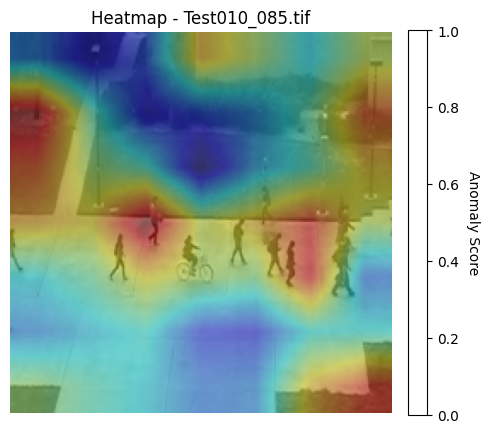

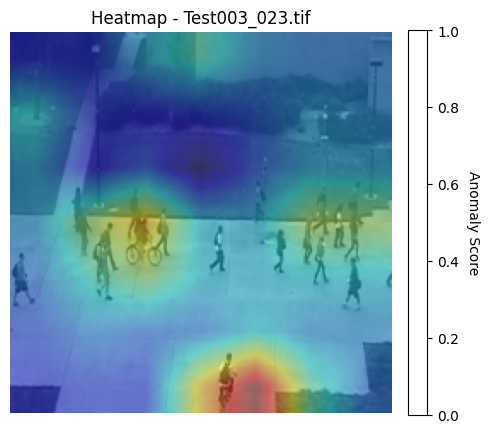

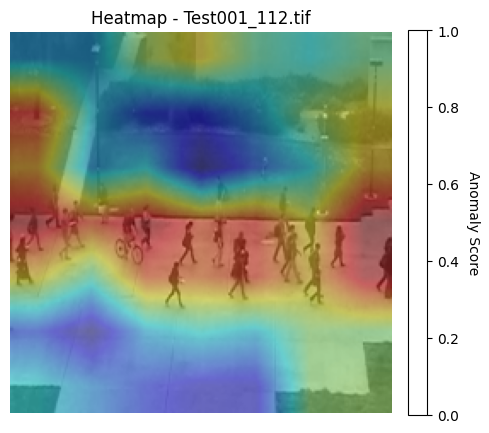

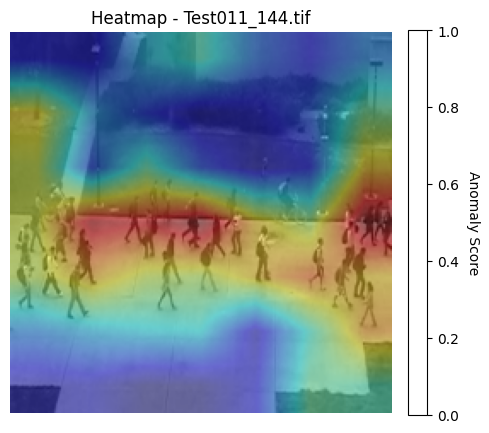

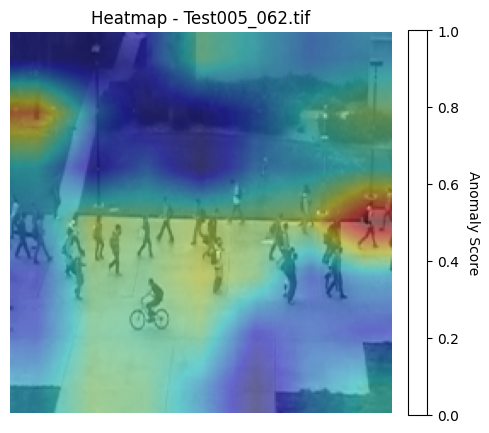

In [ ]:
import os
import numpy as np
import cv2
import torch
import timm
import torch.nn.functional as F
from torchvision import transforms
import matplotlib.pyplot as plt
import random

# ⚙️ Path to abnormal images
anomaly_dir = "/content/All_Anomaly_Frames"
IMG_SIZE = 224

# 🌀 Preprocessing
preprocess = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

# 🧠 Load model
model = timm.create_model('repvgg_a0', pretrained=True, num_classes=2)
model.eval()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# 🔍 Grad-CAM++
class GradCAMPlusPlus:
    def __init__(self, model, target_layer):
        self.model = model
        self.target_layer = target_layer
        self.gradients = None
        self.activations = None
        self._register_hooks()

    def _register_hooks(self):
        def forward_hook(module, input, output):
            self.activations = output
        def backward_hook(module, grad_in, grad_out):
            self.gradients = grad_out[0]
        self.target_layer.register_forward_hook(forward_hook)
        self.target_layer.register_backward_hook(backward_hook)

    def generate(self, input_tensor):
        self.model.zero_grad()
        output = self.model(input_tensor)
        class_idx = torch.argmax(output, dim=1).item()
        score = output[0, class_idx]
        score.backward()

        gradients = self.gradients
        activations = self.activations

        b, k, h, w = gradients.size()
        alpha_num = gradients.pow(2)
        alpha_denom = 2 * gradients.pow(2) + activations * gradients.pow(3).sum(-1).sum(-1).view(b, k, 1, 1)
        alpha_denom = torch.where(alpha_denom != 0.0, alpha_denom, torch.ones_like(alpha_denom))
        alpha = alpha_num / alpha_denom

        weights = torch.relu(F.relu(gradients) * alpha).sum(-1).sum(-1).view(b, k, 1, 1)
        cam = (weights * activations).sum(1, keepdim=True)

        cam = F.relu(cam)
        cam = F.interpolate(cam, size=(IMG_SIZE, IMG_SIZE), mode='bilinear', align_corners=False)
        cam = cam - cam.min()
        cam = cam / (cam.max() + 1e-8)

        return cam.cpu().detach().numpy().squeeze()

# 🎯 Identify target convolutional layer
conv_layers = [m for m in model.modules() if isinstance(m, torch.nn.Conv2d)]
target_layer = conv_layers[-1]
gradcam = GradCAMPlusPlus(model, target_layer)

# 📂 Get list of image paths
all_image_paths = sorted([
    os.path.join(anomaly_dir, fname)
    for fname in os.listdir(anomaly_dir)
    if fname.lower().endswith(('.jpg', '.jpeg', '.tif','tiff'))
])

# Randomly select 5 diverse images
random.seed(42)  # for reproducibility
image_paths = random.sample(all_image_paths, min(5, len(all_image_paths)))

# 🔥 Process and display heatmaps
for path in image_paths:
    img = cv2.imread(path)
    if img is None:
        continue
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_tensor = preprocess(img_rgb).unsqueeze(0).to(device)

    # Generate heatmap
    heatmap = gradcam.generate(img_tensor)

    # Convert to colored heatmap
    heatmap_color = cv2.applyColorMap(np.uint8(255 * heatmap), cv2.COLORMAP_JET)
    heatmap_color = cv2.cvtColor(heatmap_color, cv2.COLOR_BGR2RGB)

    # Resize original image
    img_resized = cv2.resize(img_rgb, (IMG_SIZE, IMG_SIZE))

    # Blend heatmap with original image
    alpha = 0.4
    blended = cv2.addWeighted(img_resized, 1 - alpha, heatmap_color, alpha, 0)

    # Display with matplotlib + colorbar
    plt.figure(figsize=(5, 5))
    plt.imshow(blended)
    plt.title(f"Heatmap - {os.path.basename(path)}")
    plt.axis('off')

    # Add colorbar from raw heatmap
    im = plt.imshow(heatmap, cmap='jet', alpha=0)
    cbar = plt.colorbar(im, fraction=0.046, pad=0.04)
    cbar.set_label("Anomaly Score", rotation=270, labelpad=15)

    plt.tight_layout()
    plt.show()



==== Training model: LSTM ====
 Run 1/5
Epoch 1/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.6401 - loss: 0.6178 - val_accuracy: 0.8813 - val_loss: 0.3512
Epoch 2/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8479 - loss: 0.3847 - val_accuracy: 0.9226 - val_loss: 0.2479
Epoch 3/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8942 - loss: 0.3049 - val_accuracy: 0.9286 - val_loss: 0.2058
Epoch 4/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9005 - loss: 0.2526 - val_accuracy: 0.9501 - val_loss: 0.1676
Epoch 5/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9318 - loss: 0.2056 - val_accuracy: 0.9536 - val_loss: 0.1422
Epoch 6/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9372 - loss: 0.1840 - val_accuracy: 0.9630 - val_loss: 0.1186
Epoch 7/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9445 - loss: 0.1616 - val_accuracy: 0.9647 - val_loss: 0.1020
Epoch 8/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy

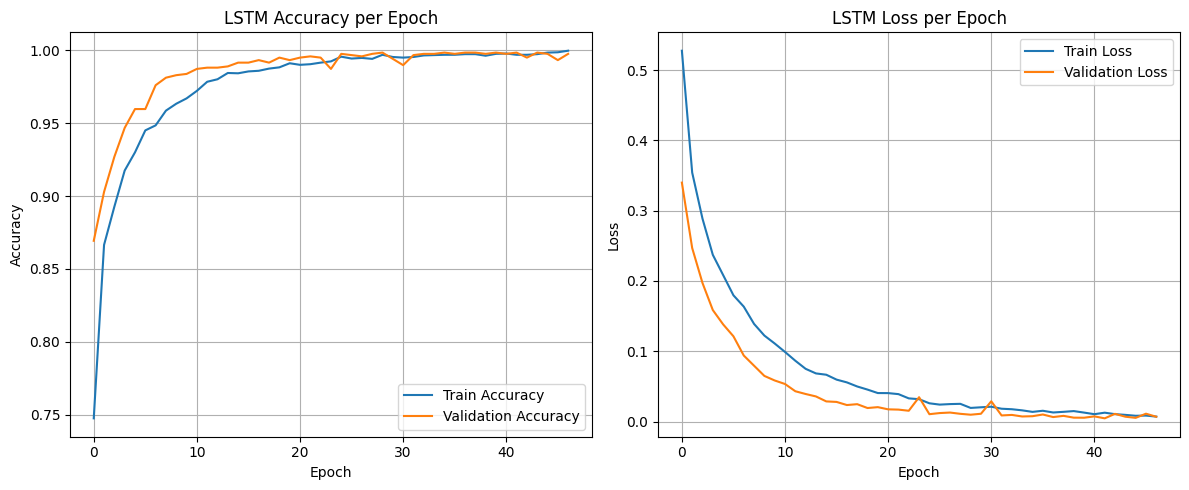


==== Summary for LSTM (over 5 runs) ====
Accuracy: 0.9967 ± 0.0013
Precision: 0.9966 ± 0.0029
Recall: 0.9969 ± 0.0013
F1: 0.9967 ± 0.0013
Auc: 0.9999 ± 0.0001


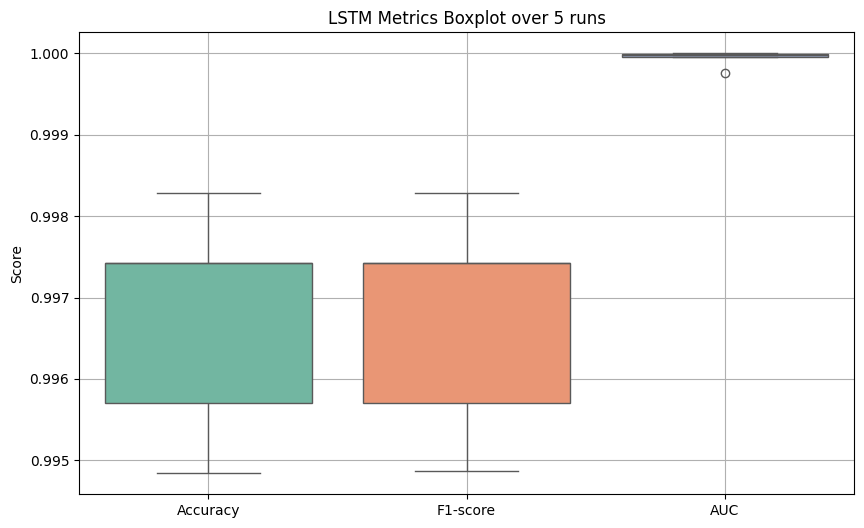


==== Training model: GRU ====
 Run 1/5
Epoch 1/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.6403 - loss: 0.6159 - val_accuracy: 0.9054 - val_loss: 0.3109
Epoch 2/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8429 - loss: 0.3723 - val_accuracy: 0.9312 - val_loss: 0.2238
Epoch 3/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8838 - loss: 0.2956 - val_accuracy: 0.9372 - val_loss: 0.1758
Epoch 4/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9042 - loss: 0.2516 - val_accuracy: 0.9450 - val_loss: 0.1413
Epoch 5/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9226 - loss: 0.1992 - val_accuracy: 0.9561 - val_loss: 0.1259
Epoch 6/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9469 - loss: 0.1738 - val_accuracy: 0.9682 - val_loss: 0.1074
Epoch 7/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9504 - loss: 0.1625 - val_accuracy: 0.9751 - val_loss: 0.0904
Epoch 8/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 

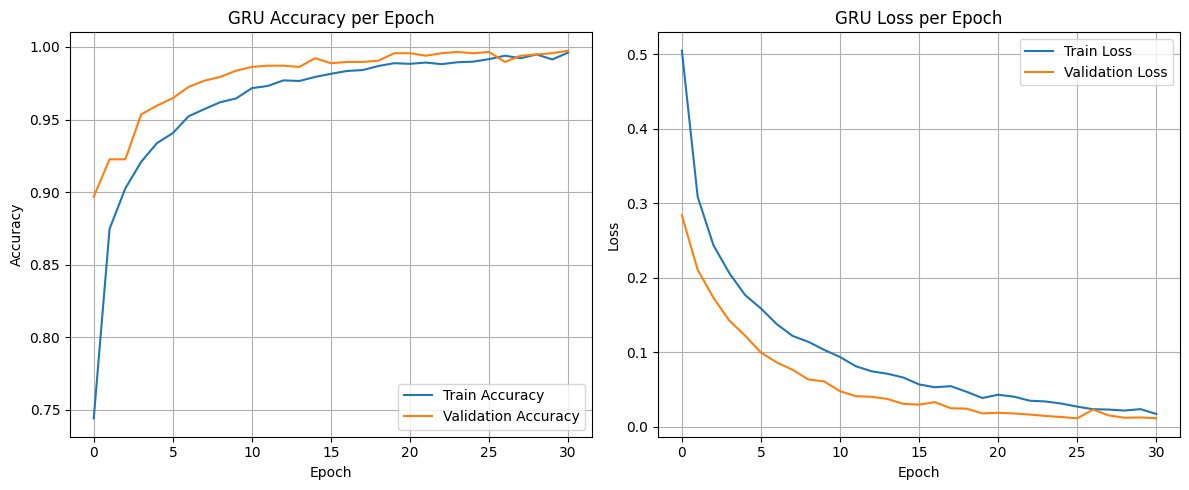


==== Summary for GRU (over 5 runs) ====
Accuracy: 0.9964 ± 0.0008
Precision: 0.9969 ± 0.0013
Recall: 0.9959 ± 0.0018
F1: 0.9964 ± 0.0008
Auc: 0.9999 ± 0.0001


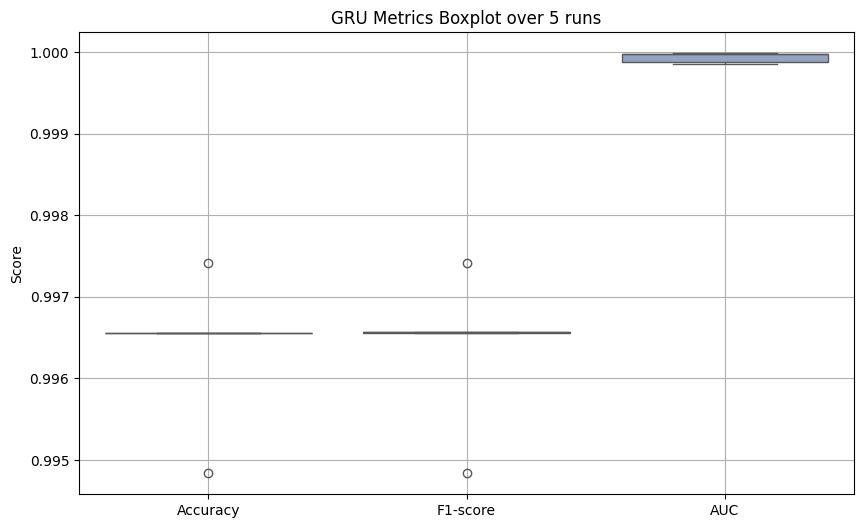


==== Training model: LSTM_GRU ====
 Run 1/5
Epoch 1/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.6046 - loss: 0.6621 - val_accuracy: 0.8667 - val_loss: 0.4811
Epoch 2/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7918 - loss: 0.4998 - val_accuracy: 0.9157 - val_loss: 0.3342
Epoch 3/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8730 - loss: 0.3759 - val_accuracy: 0.9243 - val_loss: 0.2396
Epoch 4/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8950 - loss: 0.3057 - val_accuracy: 0.9501 - val_loss: 0.1749
Epoch 5/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9163 - loss: 0.2417 - val_accuracy: 0.9587 - val_loss: 0.1296
Epoch 6/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9421 - loss: 0.1934 - val_accuracy: 0.9682 - val_loss: 0.1030
Epoch 7/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9483 - loss: 0.1570 - val_accuracy: 0.9665 - val_loss: 0.0875
Epoch 8/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - acc

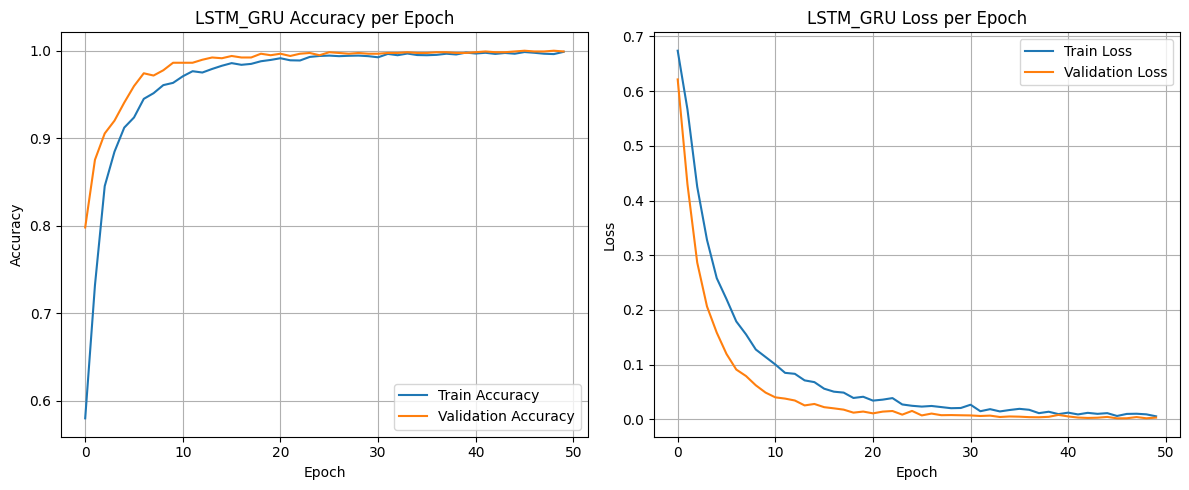


==== Summary for LSTM_GRU (over 5 runs) ====
Accuracy: 0.9967 ± 0.0021
Precision: 0.9969 ± 0.0027
Recall: 0.9966 ± 0.0022
F1: 0.9967 ± 0.0021
Auc: 1.0000 ± 0.0000


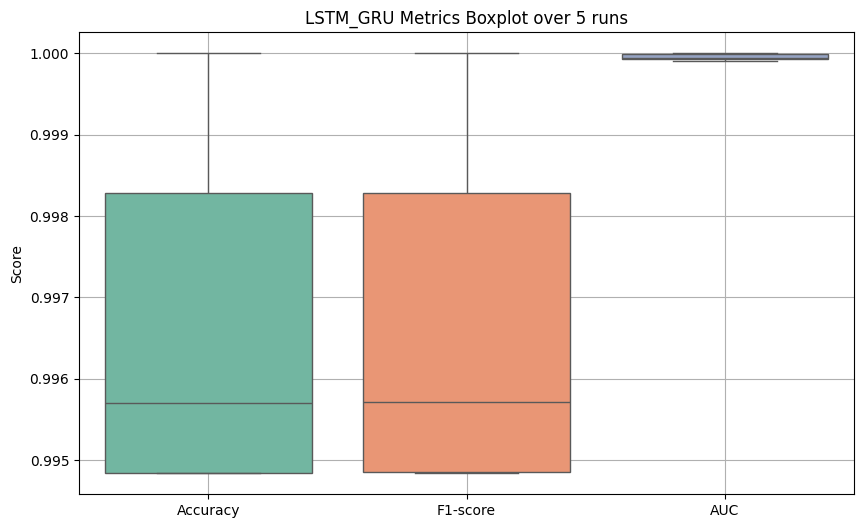


==== Training model: SimpleRNN ====
 Run 1/5
Epoch 1/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6197 - loss: 0.6430 - val_accuracy: 0.8856 - val_loss: 0.3574
Epoch 2/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8321 - loss: 0.3954 - val_accuracy: 0.9037 - val_loss: 0.2537
Epoch 3/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8680 - loss: 0.3145 - val_accuracy: 0.9218 - val_loss: 0.2039
Epoch 4/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8968 - loss: 0.2550 - val_accuracy: 0.9347 - val_loss: 0.1735
Epoch 5/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9143 - loss: 0.2262 - val_accuracy: 0.9475 - val_loss: 0.1519
Epoch 6/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9177 - loss: 0.2067 - val_accuracy: 0.9579 - val_loss: 0.1225
Epoch 7/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9357 - loss: 0.1818 - val_accuracy: 0.9656 - val_loss: 0.1082
Epoch 8/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accu

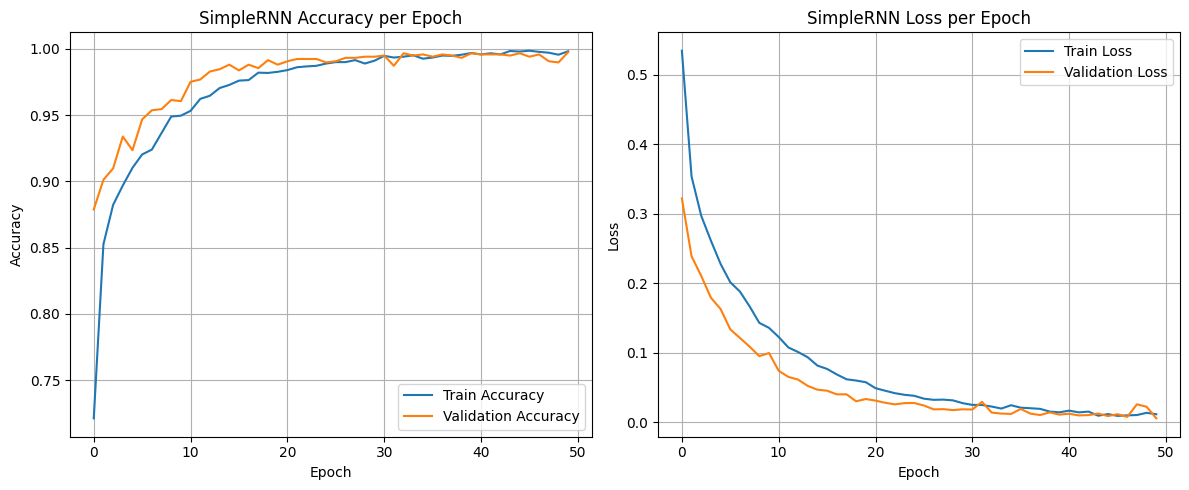


==== Summary for SimpleRNN (over 5 runs) ====
Accuracy: 0.9952 ± 0.0016
Precision: 0.9966 ± 0.0029
Recall: 0.9938 ± 0.0018
F1: 0.9952 ± 0.0016
Auc: 0.9999 ± 0.0001


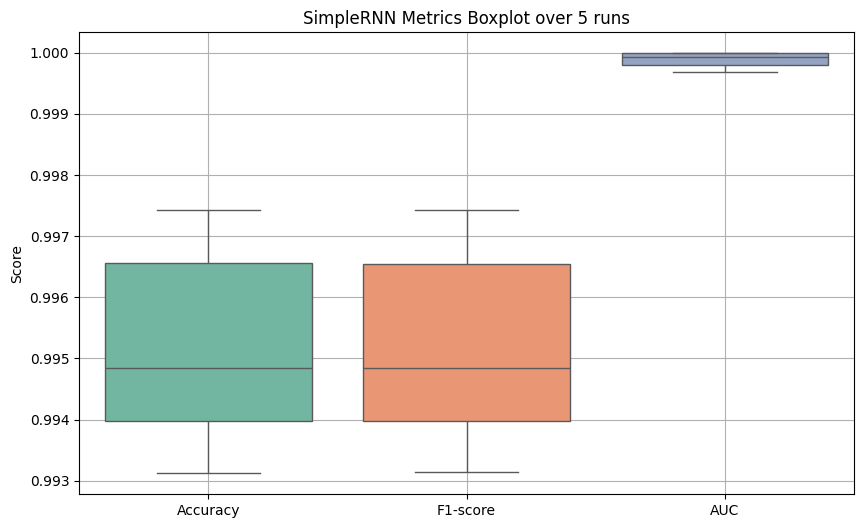


==== Training model: Dense ====
 Run 1/5
Epoch 1/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5524 - loss: 0.7177 - val_accuracy: 0.7429 - val_loss: 0.5066
Epoch 2/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7407 - loss: 0.5066 - val_accuracy: 0.8874 - val_loss: 0.3656
Epoch 3/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8124 - loss: 0.4067 - val_accuracy: 0.9149 - val_loss: 0.2881
Epoch 4/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8370 - loss: 0.3627 - val_accuracy: 0.9175 - val_loss: 0.2364
Epoch 5/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8606 - loss: 0.3156 - val_accuracy: 0.9140 - val_loss: 0.2198
Epoch 6/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8715 - loss: 0.2881 - val_accuracy: 0.9252 - val_loss: 0.1910
Epoch 7/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8823 - loss: 0.2773 - val_accuracy: 0.9329 - val_loss: 0.1815
Epoch 8/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy

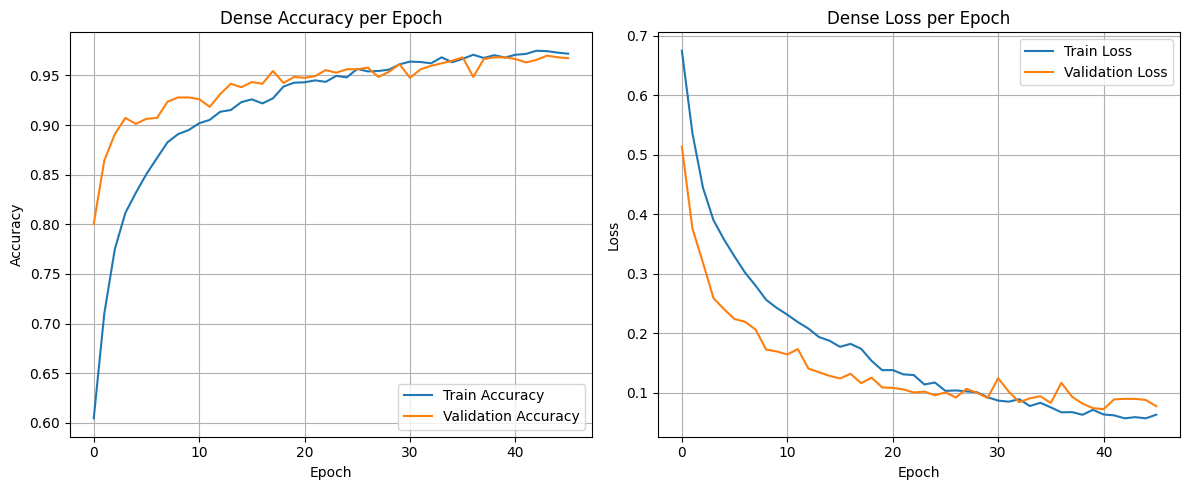


==== Summary for Dense (over 5 runs) ====
Accuracy: 0.9601 ± 0.0056
Precision: 0.9544 ± 0.0118
Recall: 0.9667 ± 0.0076
F1: 0.9604 ± 0.0054
Auc: 0.9949 ± 0.0014


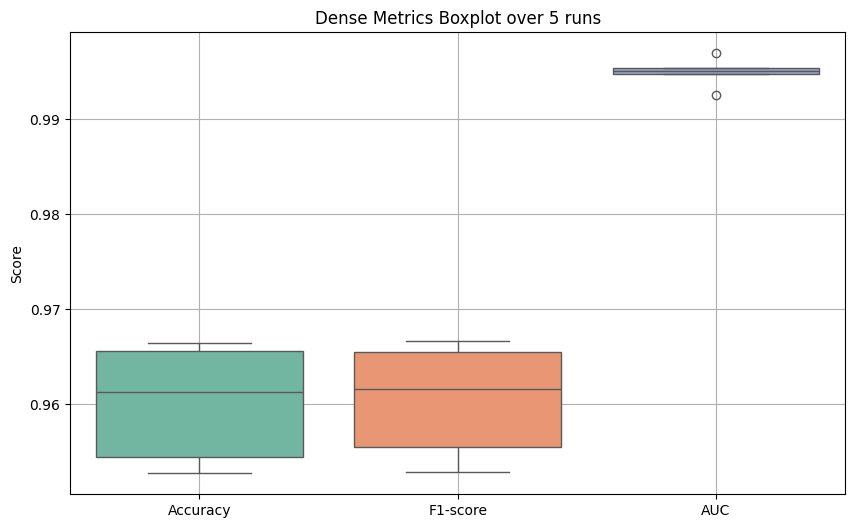


All run results saved to: /content/drive/MyDrive/ped2/results_all_models_convnext_tiny.csv


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout, LSTM, GRU, SimpleRNN, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report,
    roc_curve, precision_recall_curve, auc
)
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import gc
from tensorflow.keras import backend as K

os.environ["CUDA_VISIBLE_DEVICES"] = ""

# --- Data loading and preprocessing ---
def prepare_data(normal_path, anomaly_path):
    X_normal = np.load(normal_path, allow_pickle=True)
    if X_normal.ndim >= 4:
        X_normal = X_normal.mean(axis=(2, 3))
    X_anomaly = np.load(anomaly_path, allow_pickle=True)
    if X_anomaly.ndim >= 4:
        X_anomaly = X_anomaly.mean(axis=(2, 3))
    X = np.concatenate([X_normal, X_anomaly])
    y = np.concatenate([np.zeros(len(X_normal)), np.ones(len(X_anomaly))])
    X = X.astype(np.float32)
    X = np.nan_to_num(X, nan=0.0, posinf=0.0, neginf=0.0)
    X, y = shuffle(X, y, random_state=42)
    return X, y

def create_sequences(X, y, seq_len=5):
    X_seq, y_seq = [], []
    for i in range(len(X) - seq_len + 1):
        X_seq.append(X[i:i + seq_len])
        y_seq.append(y[i + seq_len - 1])
    return np.array(X_seq), np.array(y_seq)

# --- Model builders with 32 and 16 units ---
def build_lstm_model(input_shape):
    inputs = Input(shape=input_shape)
    x = LSTM(32, activation='tanh', recurrent_activation='sigmoid', unroll=True)(inputs)
    x = Dropout(0.3)(x)
    x = Dense(16, activation='relu')(x)
    x = Dropout(0.3)(x)
    outputs = Dense(1, activation='sigmoid')(x)
    model = Model(inputs, outputs)
    model.compile(optimizer=Adam(1e-4), loss='binary_crossentropy', metrics=['accuracy'])
    return model

def build_gru_model(input_shape):
    inputs = Input(shape=input_shape)
    x = GRU(32)(inputs)
    x = Dropout(0.3)(x)
    x = Dense(16, activation='relu')(x)
    x = Dropout(0.3)(x)
    outputs = Dense(1, activation='sigmoid')(x)
    model = Model(inputs, outputs)
    model.compile(optimizer=Adam(1e-4), loss='binary_crossentropy', metrics=['accuracy'])
    return model

def build_lstm_gru_model(input_shape):
    inputs = Input(shape=input_shape)
    x = LSTM(32, return_sequences=True, unroll=True)(inputs)
    x = Dropout(0.3)(x)
    x = GRU(32)(x)
    x = Dropout(0.3)(x)
    x = Dense(16, activation='relu')(x)
    x = Dropout(0.3)(x)
    outputs = Dense(1, activation='sigmoid')(x)
    model = Model(inputs, outputs)
    model.compile(optimizer=Adam(1e-4), loss='binary_crossentropy', metrics=['accuracy'])
    return model

def build_simple_rnn_model(input_shape):
    inputs = Input(shape=input_shape)
    x = SimpleRNN(32)(inputs)
    x = Dropout(0.3)(x)
    x = Dense(16, activation='relu')(x)
    x = Dropout(0.3)(x)
    outputs = Dense(1, activation='sigmoid')(x)
    model = Model(inputs, outputs)
    model.compile(optimizer=Adam(1e-4), loss='binary_crossentropy', metrics=['accuracy'])
    return model

def build_dense_model(input_shape):
    inputs = Input(shape=input_shape)
    x = Flatten()(inputs)
    x = Dense(32, activation='relu')(x)
    x = Dropout(0.3)(x)
    x = Dense(16, activation='relu')(x)
    x = Dropout(0.3)(x)
    outputs = Dense(1, activation='sigmoid')(x)
    model = Model(inputs, outputs)
    model.compile(optimizer=Adam(1e-4), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# --- Main execution ---
def main():
    feature_model_name = 'convnext_tiny'  # Change if needed
    seq_len = 10
    save_dir = '/content/drive/MyDrive/ped2'  # Change to your data path
    normal_path = f"{save_dir}/normal_features_{feature_model_name}.npy"
    anomaly_path = f"{save_dir}/anomaly_features_{feature_model_name}.npy"

    X, y = prepare_data(normal_path, anomaly_path)
    X_seq, y_seq = create_sequences(X, y, seq_len=seq_len)

    model_builders = {
        "LSTM": build_lstm_model,
        "GRU": build_gru_model,
        "LSTM_GRU": build_lstm_gru_model,
        "SimpleRNN": build_simple_rnn_model,
        "Dense": build_dense_model
    }

    num_runs = 5
    all_results = []

    for model_name, builder in model_builders.items():
        print(f"\n==== Training model: {model_name} ====")

        metrics_list = {
            "accuracy": [],
            "precision": [],
            "recall": [],
            "f1": [],
            "auc": []
        }

        histories = []

        for run in range(num_runs):
            print(f" Run {run+1}/{num_runs}")

            X_train, X_test, y_train, y_test = train_test_split(
                X_seq, y_seq, test_size=0.2, stratify=y_seq, random_state=run
            )

            model = builder(X_train.shape[1:])
            es = EarlyStopping(patience=5, restore_best_weights=True, verbose=0)
            history = model.fit(
                X_train, y_train,
                validation_data=(X_test, y_test),
                epochs=50,
                batch_size=32,
                callbacks=[es],
                verbose=1
            )
            histories.append(history)

            y_prob = model.predict(X_test).ravel()
            y_pred = (y_prob > 0.5).astype(int)

            acc = accuracy_score(y_test, y_pred)
            prec = precision_score(y_test, y_pred, zero_division=0)
            rec = recall_score(y_test, y_pred, zero_division=0)
            f1 = f1_score(y_test, y_pred, zero_division=0)
            auc_score = roc_auc_score(y_test, y_prob)

            # Store metrics
            metrics_list["accuracy"].append(acc)
            metrics_list["precision"].append(prec)
            metrics_list["recall"].append(rec)
            metrics_list["f1"].append(f1)
            metrics_list["auc"].append(auc_score)

            all_results.append({
                "Model": model_name,
                "Run": run + 1,
                "Accuracy": acc,
                "Precision": prec,
                "Recall": rec,
                "F1": f1,
                "AUC": auc_score
            })

            # Clear to save memory
            K.clear_session()
            del model
            gc.collect()

        # Plot training curves for last run
        last_history = histories[-1]
        plt.figure(figsize=(12,5))
        plt.subplot(1,2,1)
        plt.plot(last_history.history['accuracy'], label='Train Accuracy')
        plt.plot(last_history.history['val_accuracy'], label='Validation Accuracy')
        plt.title(f'{model_name} Accuracy per Epoch')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.grid(True)

        plt.subplot(1,2,2)
        plt.plot(last_history.history['loss'], label='Train Loss')
        plt.plot(last_history.history['val_loss'], label='Validation Loss')
        plt.title(f'{model_name} Loss per Epoch')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        plt.grid(True)

        plt.tight_layout()
        plt.show()

        # Print mean ± std summary for all runs
        print(f"\n==== Summary for {model_name} (over {num_runs} runs) ====")
        for metric in metrics_list:
            mean_val = np.mean(metrics_list[metric])
            std_val = np.std(metrics_list[metric])
            print(f"{metric.capitalize()}: {mean_val:.4f} ± {std_val:.4f}")

        # Plot boxplots of the 5 runs for metrics
        plt.figure(figsize=(10,6))
        sns.boxplot(data=[metrics_list["accuracy"], metrics_list["f1"], metrics_list["auc"]],
                    palette="Set2")
        plt.xticks([0,1,2], ['Accuracy', 'F1-score', 'AUC'])
        plt.title(f'{model_name} Metrics Boxplot over {num_runs} runs')
        plt.ylabel('Score')
        plt.grid(True)
        plt.show()

    # Save all results to CSV
    df = pd.DataFrame(all_results)
    csv_save_path = os.path.join(save_dir, f"results_all_models_{feature_model_name}.csv")
    df.to_csv(csv_save_path, index=False)
    print(f"\nAll run results saved to: {csv_save_path}")

if __name__ == "__main__":
    main()



==== Training model: LSTM ====
 Run 1/5
Epoch 1/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.5731 - loss: 0.6772 - val_accuracy: 0.8521 - val_loss: 0.4903
Epoch 2/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8020 - loss: 0.4719 - val_accuracy: 0.9226 - val_loss: 0.2933
Epoch 3/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8894 - loss: 0.3186 - val_accuracy: 0.9424 - val_loss: 0.2099
Epoch 4/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9251 - loss: 0.2331 - val_accuracy: 0.9518 - val_loss: 0.1665
Epoch 5/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9399 - loss: 0.1903 - val_accuracy: 0.9622 - val_loss: 0.1371
Epoch 6/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9512 - loss: 0.1633 - val_accuracy: 0.9518 - val_loss: 0.1333
Epoch 7/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9505 - loss: 0.1454 - val_accuracy: 0.9708 - val_loss: 0.1028
Epoch 8/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy:

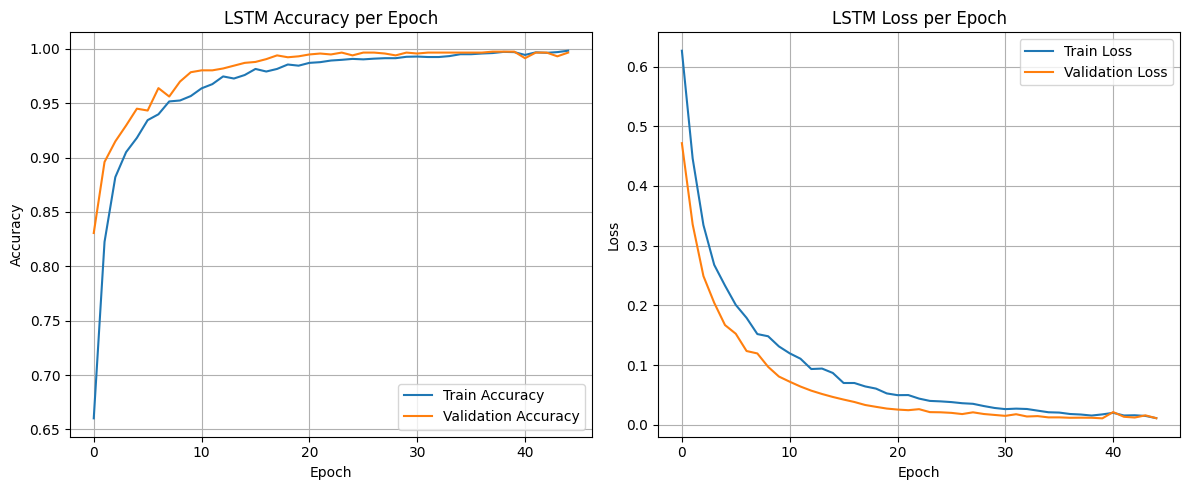


==== Summary for LSTM (over 5 runs) ====
Accuracy: 0.9967 ± 0.0013
Precision: 0.9962 ± 0.0023
Recall: 0.9973 ± 0.0008
F1: 0.9967 ± 0.0013
Auc: 0.9998 ± 0.0002


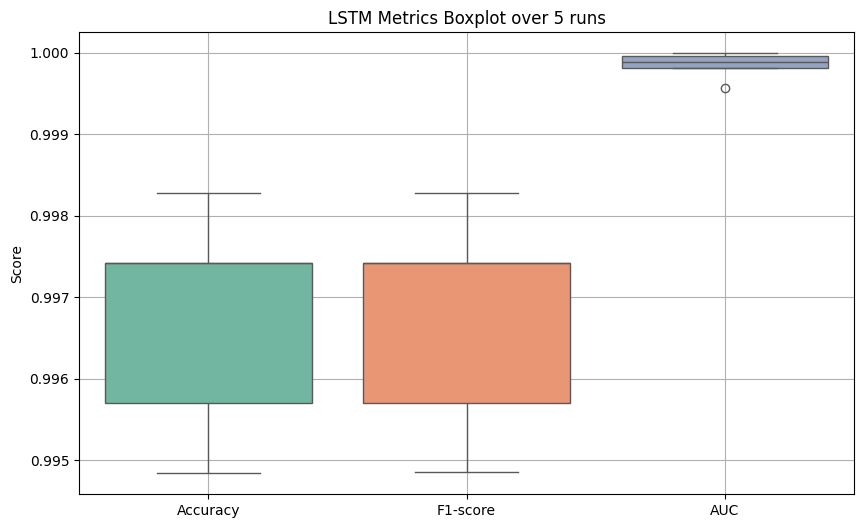


==== Training model: GRU ====
 Run 1/5
Epoch 1/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.6022 - loss: 0.6553 - val_accuracy: 0.8676 - val_loss: 0.3852
Epoch 2/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8293 - loss: 0.3990 - val_accuracy: 0.9252 - val_loss: 0.2427
Epoch 3/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9093 - loss: 0.2632 - val_accuracy: 0.9407 - val_loss: 0.1849
Epoch 4/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9201 - loss: 0.2289 - val_accuracy: 0.9475 - val_loss: 0.1582
Epoch 5/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9409 - loss: 0.1797 - val_accuracy: 0.9579 - val_loss: 0.1309
Epoch 6/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9547 - loss: 0.1539 - val_accuracy: 0.9630 - val_loss: 0.1127
Epoch 7/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9634 - loss: 0.1233 - val_accuracy: 0.9716 - val_loss: 0.0981
Epoch 8/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy:

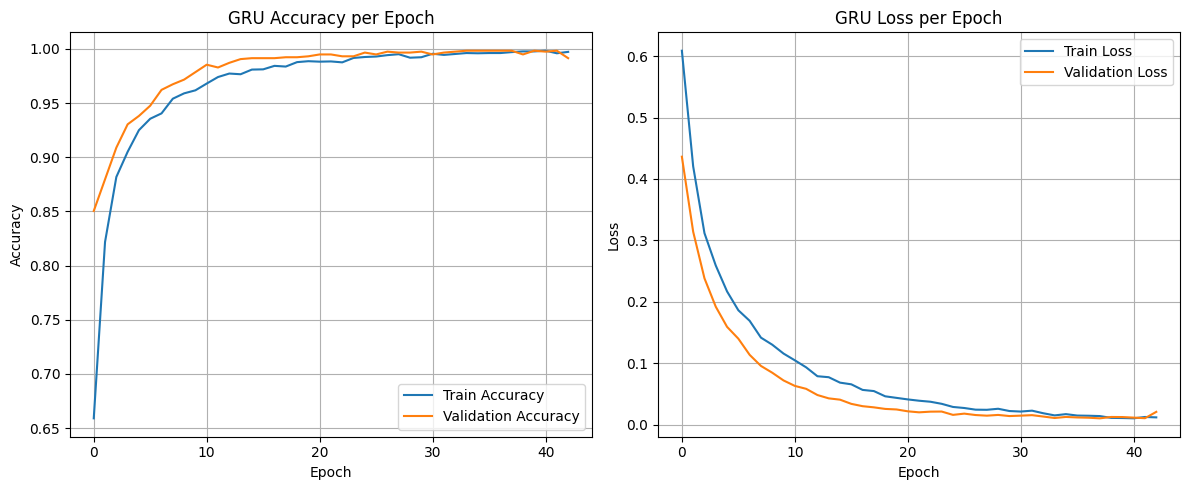


==== Summary for GRU (over 5 runs) ====
Accuracy: 0.9972 ± 0.0015
Precision: 0.9976 ± 0.0026
Recall: 0.9969 ± 0.0007
F1: 0.9973 ± 0.0015
Auc: 0.9999 ± 0.0001


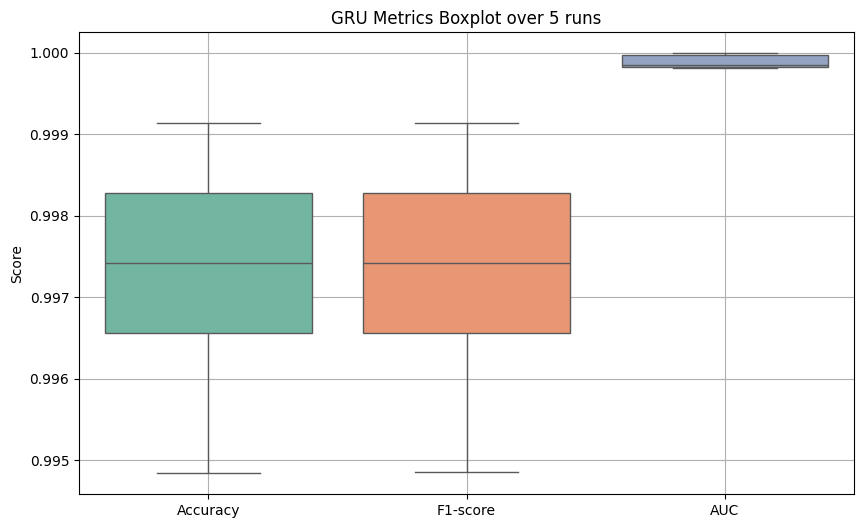


==== Training model: LSTM_GRU ====
 Run 1/5
Epoch 1/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.5449 - loss: 0.6871 - val_accuracy: 0.7721 - val_loss: 0.6239
Epoch 2/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6846 - loss: 0.6180 - val_accuracy: 0.8478 - val_loss: 0.5085
Epoch 3/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7899 - loss: 0.5195 - val_accuracy: 0.9183 - val_loss: 0.3769
Epoch 4/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8325 - loss: 0.4217 - val_accuracy: 0.9157 - val_loss: 0.2840
Epoch 5/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8847 - loss: 0.3376 - val_accuracy: 0.9433 - val_loss: 0.2148
Epoch 6/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9174 - loss: 0.2730 - val_accuracy: 0.9493 - val_loss: 0.1760
Epoch 7/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9236 - loss: 0.2330 - val_accuracy: 0.9544 - val_loss: 0.1490
Epoch 8/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step

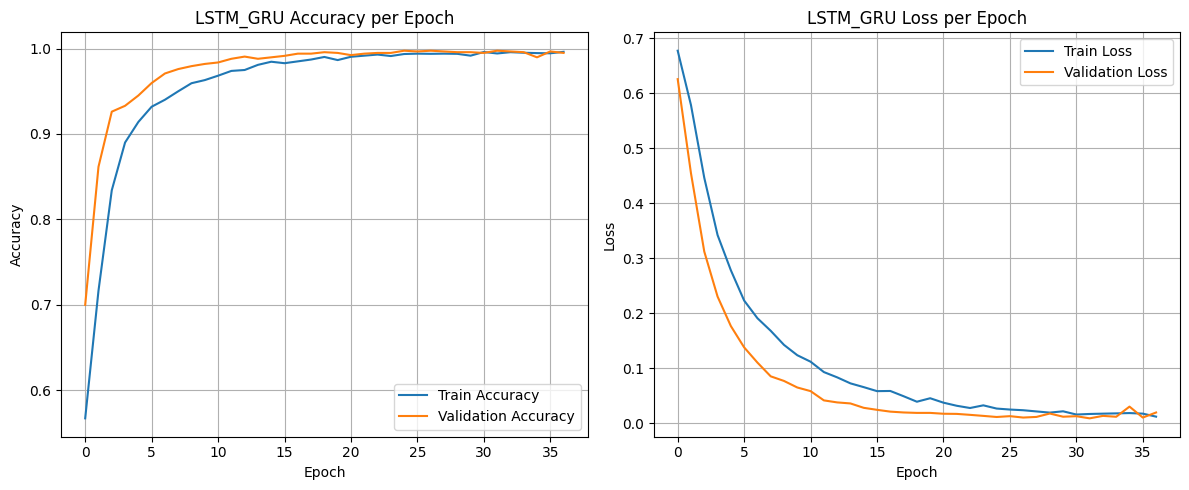


==== Summary for LSTM_GRU (over 5 runs) ====
Accuracy: 0.9952 ± 0.0016
Precision: 0.9959 ± 0.0014
Recall: 0.9945 ± 0.0020
F1: 0.9952 ± 0.0016
Auc: 0.9999 ± 0.0001


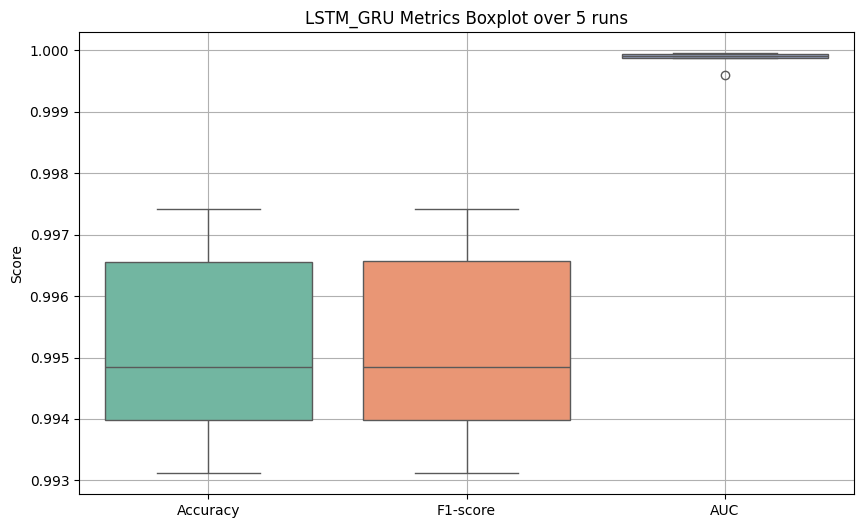


==== Training model: SimpleRNN ====
 Run 1/5
Epoch 1/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5867 - loss: 0.7008 - val_accuracy: 0.8272 - val_loss: 0.4480
Epoch 2/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7644 - loss: 0.4778 - val_accuracy: 0.8899 - val_loss: 0.3179
Epoch 3/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8354 - loss: 0.3660 - val_accuracy: 0.9192 - val_loss: 0.2514
Epoch 4/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8861 - loss: 0.2907 - val_accuracy: 0.9295 - val_loss: 0.2092
Epoch 5/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9056 - loss: 0.2486 - val_accuracy: 0.9372 - val_loss: 0.1789
Epoch 6/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9212 - loss: 0.2191 - val_accuracy: 0.9518 - val_loss: 0.1538
Epoch 7/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9235 - loss: 0.2098 - val_accuracy: 0.9536 - val_loss: 0.1363
Epoch 8/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accu

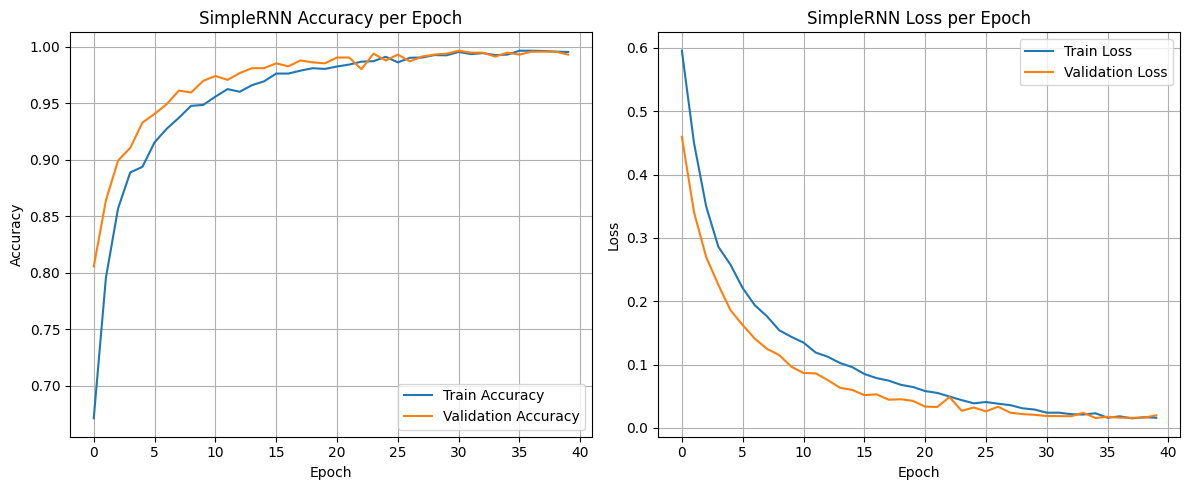


==== Summary for SimpleRNN (over 5 runs) ====
Accuracy: 0.9947 ± 0.0011
Precision: 0.9959 ± 0.0023
Recall: 0.9935 ± 0.0020
F1: 0.9947 ± 0.0011
Auc: 0.9999 ± 0.0001


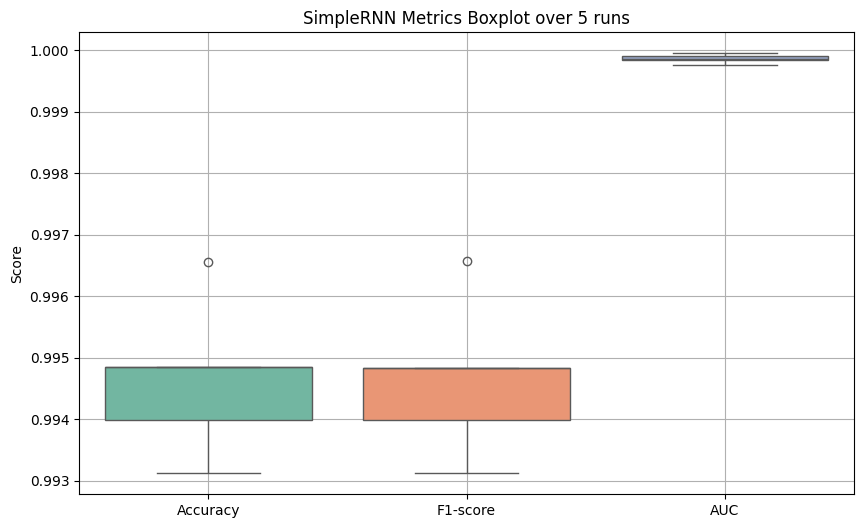


==== Training model: Dense ====
 Run 1/5
Epoch 1/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5424 - loss: 0.7015 - val_accuracy: 0.6707 - val_loss: 0.6123
Epoch 2/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6473 - loss: 0.6024 - val_accuracy: 0.8590 - val_loss: 0.5223
Epoch 3/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7151 - loss: 0.5387 - val_accuracy: 0.8839 - val_loss: 0.4771
Epoch 4/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7097 - loss: 0.5154 - val_accuracy: 0.8418 - val_loss: 0.4350
Epoch 5/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7483 - loss: 0.4644 - val_accuracy: 0.8882 - val_loss: 0.3874
Epoch 6/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7508 - loss: 0.4416 - val_accuracy: 0.9028 - val_loss: 0.3170
Epoch 7/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7990 - loss: 0.3931 - val_accuracy: 0.9140 - val_loss: 0.2772
Epoch 8/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy

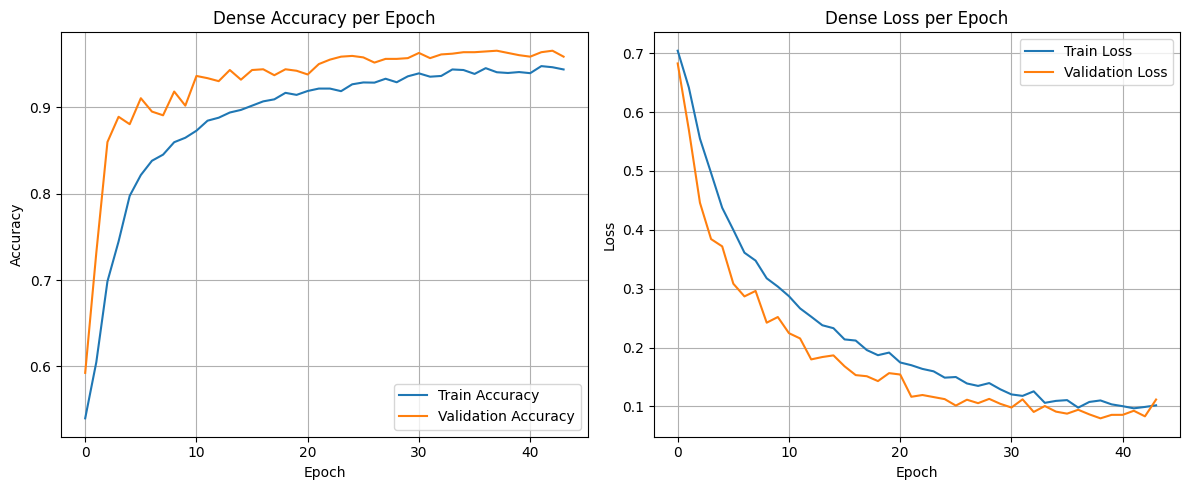


==== Summary for Dense (over 5 runs) ====
Accuracy: 0.9654 ± 0.0032
Precision: 0.9709 ± 0.0068
Recall: 0.9598 ± 0.0093
F1: 0.9653 ± 0.0033
Auc: 0.9957 ± 0.0008


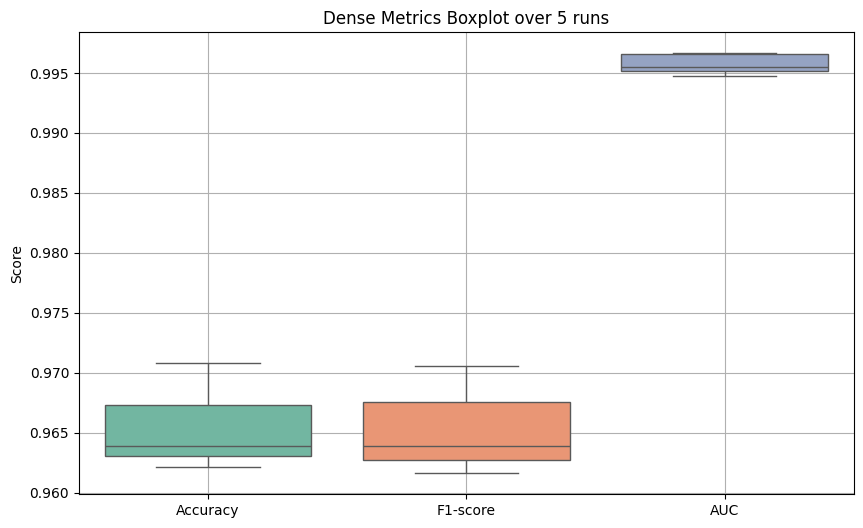


All run results saved to: /content/drive/MyDrive/ped2/results_all_models_repvgg_a0.csv


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout, LSTM, GRU, SimpleRNN, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report,
    roc_curve, precision_recall_curve, auc
)
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import gc
from tensorflow.keras import backend as K

os.environ["CUDA_VISIBLE_DEVICES"] = ""

# --- Data loading and preprocessing ---
def prepare_data(normal_path, anomaly_path):
    X_normal = np.load(normal_path, allow_pickle=True)
    if X_normal.ndim >= 4:
        X_normal = X_normal.mean(axis=(2, 3))
    X_anomaly = np.load(anomaly_path, allow_pickle=True)
    if X_anomaly.ndim >= 4:
        X_anomaly = X_anomaly.mean(axis=(2, 3))
    X = np.concatenate([X_normal, X_anomaly])
    y = np.concatenate([np.zeros(len(X_normal)), np.ones(len(X_anomaly))])
    X = X.astype(np.float32)
    X = np.nan_to_num(X, nan=0.0, posinf=0.0, neginf=0.0)
    X, y = shuffle(X, y, random_state=42)
    return X, y

def create_sequences(X, y, seq_len=5):
    X_seq, y_seq = [], []
    for i in range(len(X) - seq_len + 1):
        X_seq.append(X[i:i + seq_len])
        y_seq.append(y[i + seq_len - 1])
    return np.array(X_seq), np.array(y_seq)

# --- Model builders with 32 and 16 units ---
def build_lstm_model(input_shape):
    inputs = Input(shape=input_shape)
    x = LSTM(32, activation='tanh', recurrent_activation='sigmoid', unroll=True)(inputs)
    x = Dropout(0.3)(x)
    x = Dense(16, activation='relu')(x)
    x = Dropout(0.3)(x)
    outputs = Dense(1, activation='sigmoid')(x)
    model = Model(inputs, outputs)
    model.compile(optimizer=Adam(1e-4), loss='binary_crossentropy', metrics=['accuracy'])
    return model

def build_gru_model(input_shape):
    inputs = Input(shape=input_shape)
    x = GRU(32)(inputs)
    x = Dropout(0.3)(x)
    x = Dense(16, activation='relu')(x)
    x = Dropout(0.3)(x)
    outputs = Dense(1, activation='sigmoid')(x)
    model = Model(inputs, outputs)
    model.compile(optimizer=Adam(1e-4), loss='binary_crossentropy', metrics=['accuracy'])
    return model

def build_lstm_gru_model(input_shape):
    inputs = Input(shape=input_shape)
    x = LSTM(32, return_sequences=True, unroll=True)(inputs)
    x = Dropout(0.3)(x)
    x = GRU(32)(x)
    x = Dropout(0.3)(x)
    x = Dense(16, activation='relu')(x)
    x = Dropout(0.3)(x)
    outputs = Dense(1, activation='sigmoid')(x)
    model = Model(inputs, outputs)
    model.compile(optimizer=Adam(1e-4), loss='binary_crossentropy', metrics=['accuracy'])
    return model

def build_simple_rnn_model(input_shape):
    inputs = Input(shape=input_shape)
    x = SimpleRNN(32)(inputs)
    x = Dropout(0.3)(x)
    x = Dense(16, activation='relu')(x)
    x = Dropout(0.3)(x)
    outputs = Dense(1, activation='sigmoid')(x)
    model = Model(inputs, outputs)
    model.compile(optimizer=Adam(1e-4), loss='binary_crossentropy', metrics=['accuracy'])
    return model

def build_dense_model(input_shape):
    inputs = Input(shape=input_shape)
    x = Flatten()(inputs)
    x = Dense(32, activation='relu')(x)
    x = Dropout(0.3)(x)
    x = Dense(16, activation='relu')(x)
    x = Dropout(0.3)(x)
    outputs = Dense(1, activation='sigmoid')(x)
    model = Model(inputs, outputs)
    model.compile(optimizer=Adam(1e-4), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# --- Main execution ---
def main():
    feature_model_name = 'repvgg_a0'  # Change if needed
    seq_len = 10
    save_dir = '/content/drive/MyDrive/ped2'  # Change to your data path
    normal_path = f"{save_dir}/normal_features_{feature_model_name}.npy"
    anomaly_path = f"{save_dir}/anomaly_features_{feature_model_name}.npy"

    X, y = prepare_data(normal_path, anomaly_path)
    X_seq, y_seq = create_sequences(X, y, seq_len=seq_len)

    model_builders = {
        "LSTM": build_lstm_model,
        "GRU": build_gru_model,
        "LSTM_GRU": build_lstm_gru_model,
        "SimpleRNN": build_simple_rnn_model,
        "Dense": build_dense_model
    }

    num_runs = 5
    all_results = []

    for model_name, builder in model_builders.items():
        print(f"\n==== Training model: {model_name} ====")

        metrics_list = {
            "accuracy": [],
            "precision": [],
            "recall": [],
            "f1": [],
            "auc": []
        }

        histories = []

        for run in range(num_runs):
            print(f" Run {run+1}/{num_runs}")

            X_train, X_test, y_train, y_test = train_test_split(
                X_seq, y_seq, test_size=0.2, stratify=y_seq, random_state=run
            )

            model = builder(X_train.shape[1:])
            es = EarlyStopping(patience=5, restore_best_weights=True, verbose=0)
            history = model.fit(
                X_train, y_train,
                validation_data=(X_test, y_test),
                epochs=50,
                batch_size=32,
                callbacks=[es],
                verbose=1
            )
            histories.append(history)

            y_prob = model.predict(X_test).ravel()
            y_pred = (y_prob > 0.5).astype(int)

            acc = accuracy_score(y_test, y_pred)
            prec = precision_score(y_test, y_pred, zero_division=0)
            rec = recall_score(y_test, y_pred, zero_division=0)
            f1 = f1_score(y_test, y_pred, zero_division=0)
            auc_score = roc_auc_score(y_test, y_prob)

            # Store metrics
            metrics_list["accuracy"].append(acc)
            metrics_list["precision"].append(prec)
            metrics_list["recall"].append(rec)
            metrics_list["f1"].append(f1)
            metrics_list["auc"].append(auc_score)

            all_results.append({
                "Model": model_name,
                "Run": run + 1,
                "Accuracy": acc,
                "Precision": prec,
                "Recall": rec,
                "F1": f1,
                "AUC": auc_score
            })

            # Clear to save memory
            K.clear_session()
            del model
            gc.collect()

        # Plot training curves for last run
        last_history = histories[-1]
        plt.figure(figsize=(12,5))
        plt.subplot(1,2,1)
        plt.plot(last_history.history['accuracy'], label='Train Accuracy')
        plt.plot(last_history.history['val_accuracy'], label='Validation Accuracy')
        plt.title(f'{model_name} Accuracy per Epoch')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.grid(True)

        plt.subplot(1,2,2)
        plt.plot(last_history.history['loss'], label='Train Loss')
        plt.plot(last_history.history['val_loss'], label='Validation Loss')
        plt.title(f'{model_name} Loss per Epoch')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        plt.grid(True)

        plt.tight_layout()
        plt.show()

        # Print mean ± std summary for all runs
        print(f"\n==== Summary for {model_name} (over {num_runs} runs) ====")
        for metric in metrics_list:
            mean_val = np.mean(metrics_list[metric])
            std_val = np.std(metrics_list[metric])
            print(f"{metric.capitalize()}: {mean_val:.4f} ± {std_val:.4f}")

        # Plot boxplots of the 5 runs for metrics
        plt.figure(figsize=(10,6))
        sns.boxplot(data=[metrics_list["accuracy"], metrics_list["f1"], metrics_list["auc"]],
                    palette="Set2")
        plt.xticks([0,1,2], ['Accuracy', 'F1-score', 'AUC'])
        plt.title(f'{model_name} Metrics Boxplot over {num_runs} runs')
        plt.ylabel('Score')
        plt.grid(True)
        plt.show()

    # Save all results to CSV
    df = pd.DataFrame(all_results)
    csv_save_path = os.path.join(save_dir, f"results_all_models_{feature_model_name}.csv")
    df.to_csv(csv_save_path, index=False)
    print(f"\nAll run results saved to: {csv_save_path}")

if __name__ == "__main__":
    main()



==== Training model: LSTM ====
 Run 1/5
Epoch 1/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.5698 - loss: 0.6661 - val_accuracy: 0.8340 - val_loss: 0.4713
Epoch 2/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7928 - loss: 0.4795 - val_accuracy: 0.8719 - val_loss: 0.3571
Epoch 3/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8559 - loss: 0.3758 - val_accuracy: 0.8934 - val_loss: 0.2913
Epoch 4/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8771 - loss: 0.3259 - val_accuracy: 0.9114 - val_loss: 0.2439
Epoch 5/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8938 - loss: 0.2817 - val_accuracy: 0.9243 - val_loss: 0.2103
Epoch 6/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9145 - loss: 0.2415 - val_accuracy: 0.9381 - val_loss: 0.1859
Epoch 7/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9234 - loss: 0.2149 - val_accuracy: 0.9390 - val_loss: 0.1696
Epoch 8/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy:

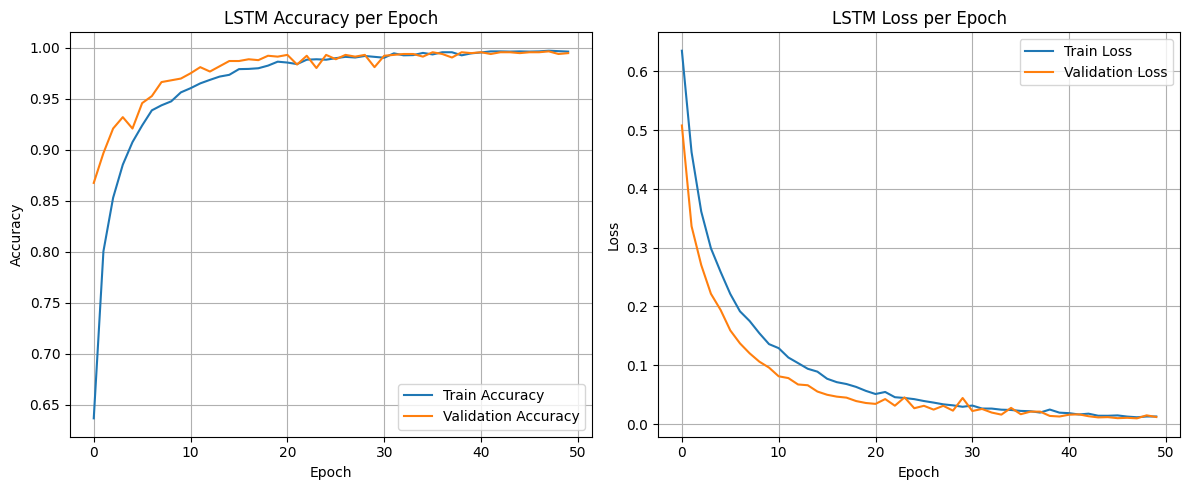


==== Summary for LSTM (over 5 runs) ====
Accuracy: 0.9952 ± 0.0016
Precision: 0.9952 ± 0.0023
Recall: 0.9952 ± 0.0013
F1: 0.9952 ± 0.0016
Auc: 0.9999 ± 0.0001


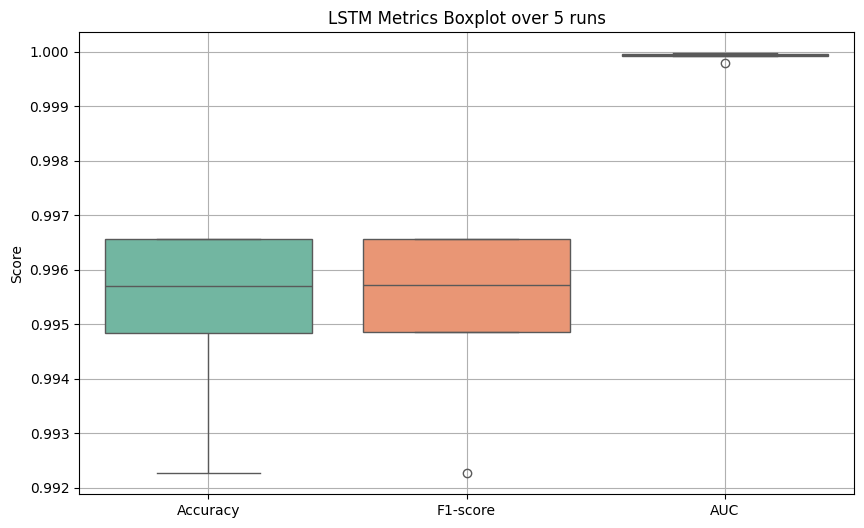


==== Training model: GRU ====
 Run 1/5
Epoch 1/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.5407 - loss: 0.7118 - val_accuracy: 0.8117 - val_loss: 0.5137
Epoch 2/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7467 - loss: 0.5117 - val_accuracy: 0.8736 - val_loss: 0.3669
Epoch 3/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8492 - loss: 0.3891 - val_accuracy: 0.8968 - val_loss: 0.2954
Epoch 4/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8786 - loss: 0.3276 - val_accuracy: 0.9114 - val_loss: 0.2539
Epoch 5/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8986 - loss: 0.2868 - val_accuracy: 0.9252 - val_loss: 0.2165
Epoch 6/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9074 - loss: 0.2558 - val_accuracy: 0.9295 - val_loss: 0.1891
Epoch 7/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9333 - loss: 0.2196 - val_accuracy: 0.9372 - val_loss: 0.1693
Epoch 8/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 

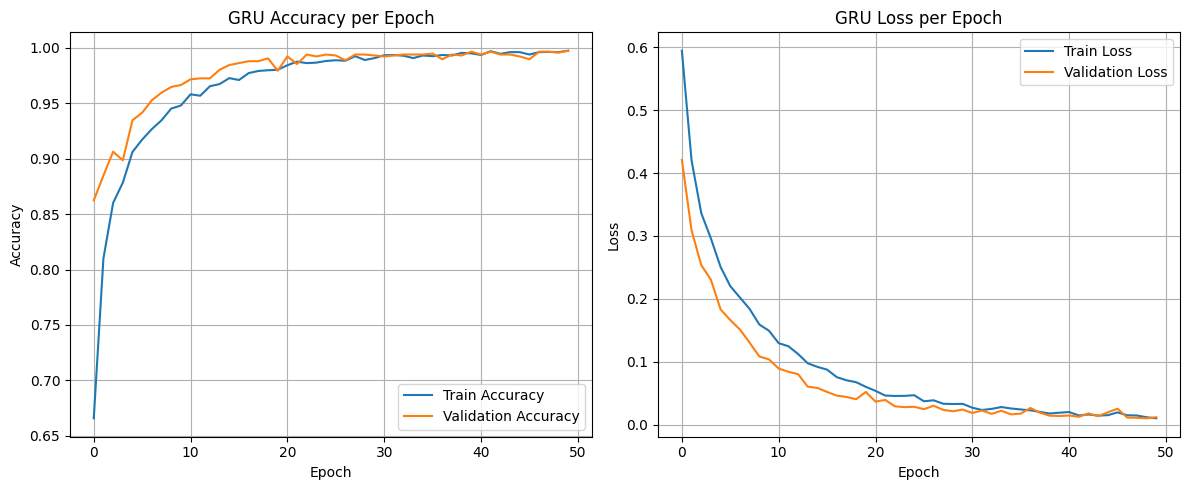


==== Summary for GRU (over 5 runs) ====
Accuracy: 0.9962 ± 0.0009
Precision: 0.9962 ± 0.0013
Recall: 0.9962 ± 0.0007
F1: 0.9962 ± 0.0009
Auc: 0.9999 ± 0.0001


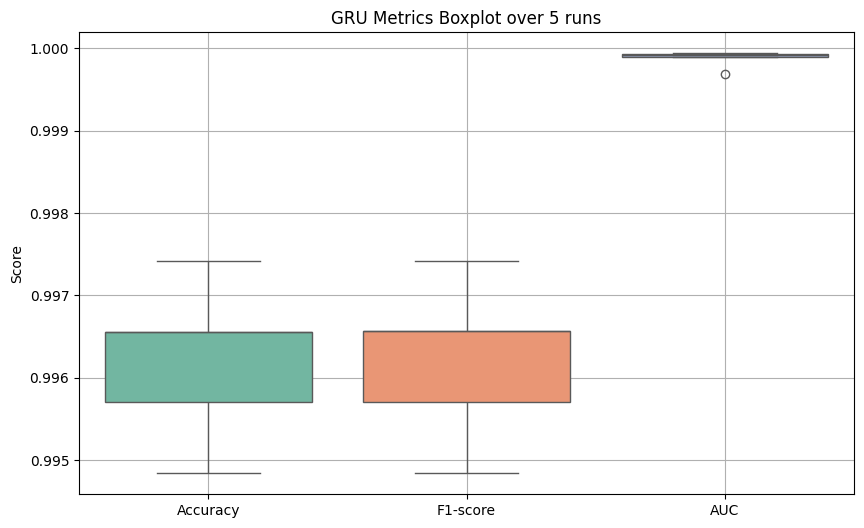


==== Training model: LSTM_GRU ====
 Run 1/5
Epoch 1/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.5071 - loss: 0.6959 - val_accuracy: 0.7171 - val_loss: 0.6512
Epoch 2/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6389 - loss: 0.6404 - val_accuracy: 0.8272 - val_loss: 0.5256
Epoch 3/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7673 - loss: 0.5281 - val_accuracy: 0.8856 - val_loss: 0.3841
Epoch 4/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8288 - loss: 0.4258 - val_accuracy: 0.9011 - val_loss: 0.2935
Epoch 5/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8722 - loss: 0.3421 - val_accuracy: 0.9063 - val_loss: 0.2295
Epoch 6/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9158 - loss: 0.2607 - val_accuracy: 0.9398 - val_loss: 0.1822
Epoch 7/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9243 - loss: 0.2267 - val_accuracy: 0.9433 - val_loss: 0.1556
Epoch 8/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step 

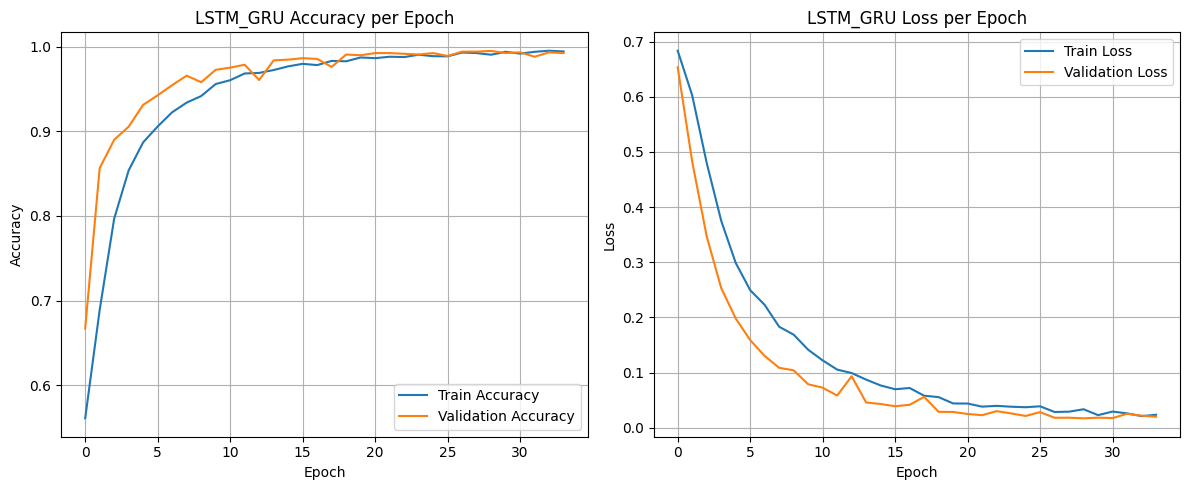


==== Summary for LSTM_GRU (over 5 runs) ====
Accuracy: 0.9945 ± 0.0009
Precision: 0.9966 ± 0.0019
Recall: 0.9924 ± 0.0008
F1: 0.9945 ± 0.0009
Auc: 0.9998 ± 0.0000


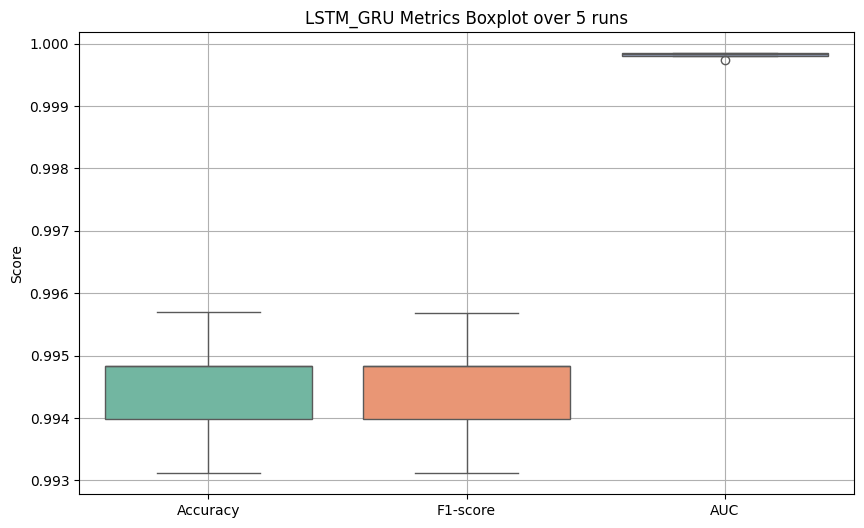


==== Training model: SimpleRNN ====
 Run 1/5
Epoch 1/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.5294 - loss: 0.7221 - val_accuracy: 0.7618 - val_loss: 0.5290
Epoch 2/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7581 - loss: 0.5286 - val_accuracy: 0.8788 - val_loss: 0.3980
Epoch 3/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8165 - loss: 0.4312 - val_accuracy: 0.8951 - val_loss: 0.3168
Epoch 4/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8552 - loss: 0.3574 - val_accuracy: 0.9080 - val_loss: 0.2714
Epoch 5/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8716 - loss: 0.3288 - val_accuracy: 0.9149 - val_loss: 0.2358
Epoch 6/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8939 - loss: 0.2923 - val_accuracy: 0.9235 - val_loss: 0.2065
Epoch 7/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9038 - loss: 0.2505 - val_accuracy: 0.9278 - val_loss: 0.1851
Epoch 8/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accu

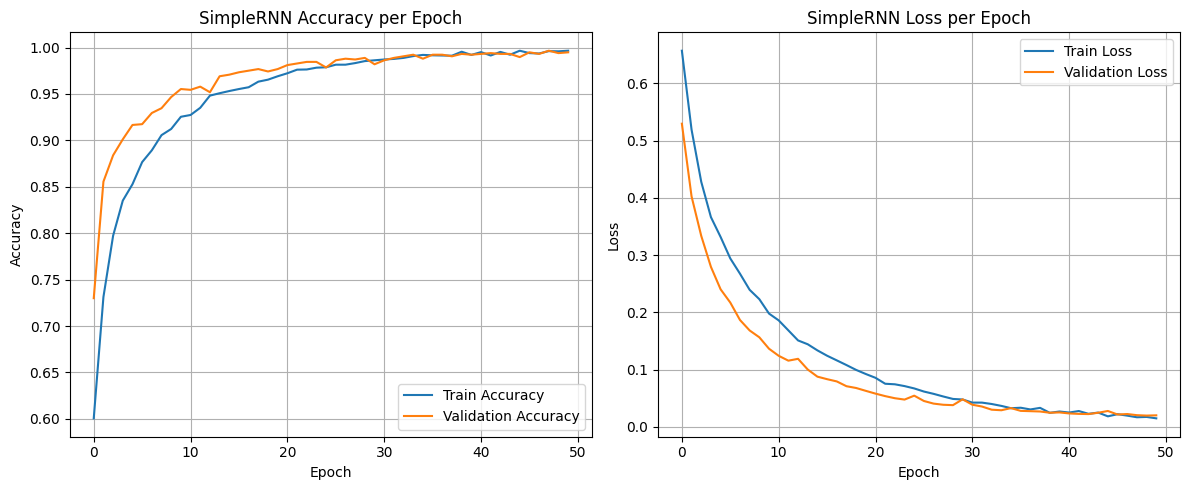


==== Summary for SimpleRNN (over 5 runs) ====
Accuracy: 0.9943 ± 0.0012
Precision: 0.9942 ± 0.0032
Recall: 0.9945 ± 0.0025
F1: 0.9943 ± 0.0012
Auc: 0.9997 ± 0.0001


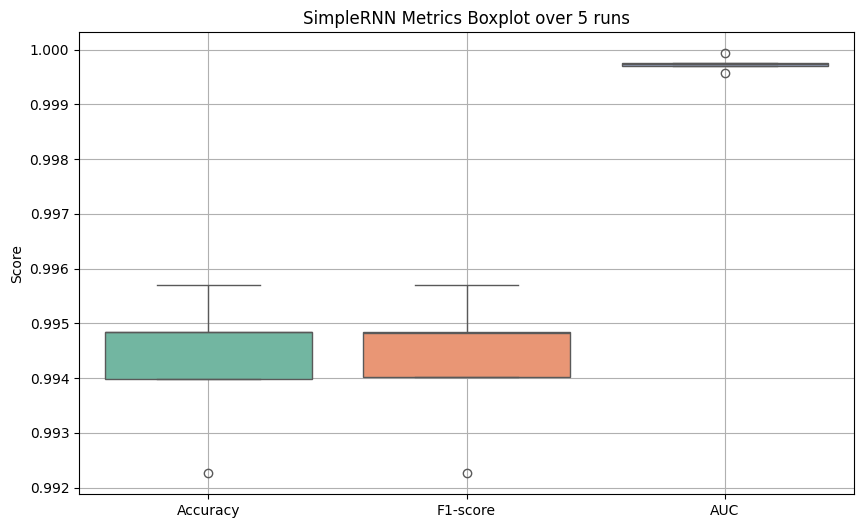


==== Training model: Dense ====
 Run 1/5
Epoch 1/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5245 - loss: 0.7177 - val_accuracy: 0.7231 - val_loss: 0.6532
Epoch 2/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6373 - loss: 0.6383 - val_accuracy: 0.8298 - val_loss: 0.6078
Epoch 3/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6875 - loss: 0.6030 - val_accuracy: 0.8581 - val_loss: 0.5481
Epoch 4/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7151 - loss: 0.5546 - val_accuracy: 0.8753 - val_loss: 0.4736
Epoch 5/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7620 - loss: 0.5101 - val_accuracy: 0.8702 - val_loss: 0.4389
Epoch 6/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7851 - loss: 0.4702 - val_accuracy: 0.8796 - val_loss: 0.3874
Epoch 7/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8124 - loss: 0.4335 - val_accuracy: 0.8452 - val_loss: 0.3636
Epoch 8/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy

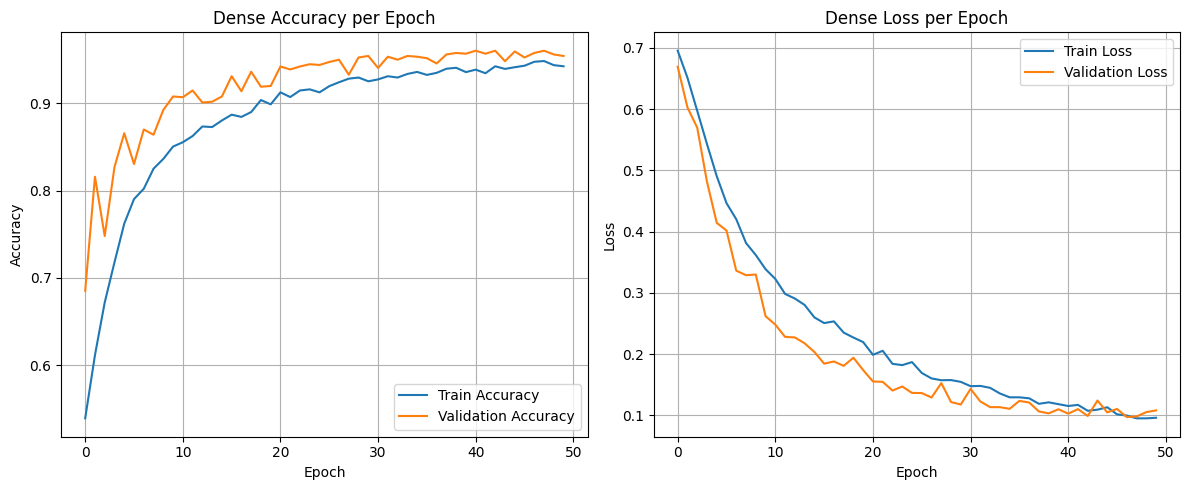


==== Summary for Dense (over 5 runs) ====
Accuracy: 0.9587 ± 0.0045
Precision: 0.9591 ± 0.0056
Recall: 0.9584 ± 0.0035
F1: 0.9588 ± 0.0044
Auc: 0.9938 ± 0.0011


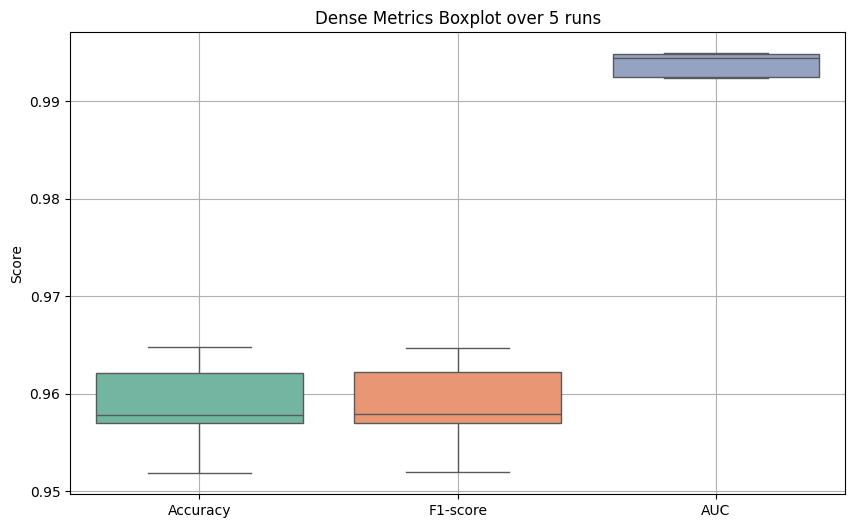


All run results saved to: /content/drive/MyDrive/ped2/results_all_models_mobileone_s0.csv


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout, LSTM, GRU, SimpleRNN, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report,
    roc_curve, precision_recall_curve, auc
)
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import gc
from tensorflow.keras import backend as K

os.environ["CUDA_VISIBLE_DEVICES"] = ""

# --- Data loading and preprocessing ---
def prepare_data(normal_path, anomaly_path):
    X_normal = np.load(normal_path, allow_pickle=True)
    if X_normal.ndim >= 4:
        X_normal = X_normal.mean(axis=(2, 3))
    X_anomaly = np.load(anomaly_path, allow_pickle=True)
    if X_anomaly.ndim >= 4:
        X_anomaly = X_anomaly.mean(axis=(2, 3))
    X = np.concatenate([X_normal, X_anomaly])
    y = np.concatenate([np.zeros(len(X_normal)), np.ones(len(X_anomaly))])
    X = X.astype(np.float32)
    X = np.nan_to_num(X, nan=0.0, posinf=0.0, neginf=0.0)
    X, y = shuffle(X, y, random_state=42)
    return X, y

def create_sequences(X, y, seq_len=5):
    X_seq, y_seq = [], []
    for i in range(len(X) - seq_len + 1):
        X_seq.append(X[i:i + seq_len])
        y_seq.append(y[i + seq_len - 1])
    return np.array(X_seq), np.array(y_seq)

# --- Model builders with 32 and 16 units ---
def build_lstm_model(input_shape):
    inputs = Input(shape=input_shape)
    x = LSTM(32, activation='tanh', recurrent_activation='sigmoid', unroll=True)(inputs)
    x = Dropout(0.3)(x)
    x = Dense(16, activation='relu')(x)
    x = Dropout(0.3)(x)
    outputs = Dense(1, activation='sigmoid')(x)
    model = Model(inputs, outputs)
    model.compile(optimizer=Adam(1e-4), loss='binary_crossentropy', metrics=['accuracy'])
    return model

def build_gru_model(input_shape):
    inputs = Input(shape=input_shape)
    x = GRU(32)(inputs)
    x = Dropout(0.3)(x)
    x = Dense(16, activation='relu')(x)
    x = Dropout(0.3)(x)
    outputs = Dense(1, activation='sigmoid')(x)
    model = Model(inputs, outputs)
    model.compile(optimizer=Adam(1e-4), loss='binary_crossentropy', metrics=['accuracy'])
    return model

def build_lstm_gru_model(input_shape):
    inputs = Input(shape=input_shape)
    x = LSTM(32, return_sequences=True, unroll=True)(inputs)
    x = Dropout(0.3)(x)
    x = GRU(32)(x)
    x = Dropout(0.3)(x)
    x = Dense(16, activation='relu')(x)
    x = Dropout(0.3)(x)
    outputs = Dense(1, activation='sigmoid')(x)
    model = Model(inputs, outputs)
    model.compile(optimizer=Adam(1e-4), loss='binary_crossentropy', metrics=['accuracy'])
    return model

def build_simple_rnn_model(input_shape):
    inputs = Input(shape=input_shape)
    x = SimpleRNN(32)(inputs)
    x = Dropout(0.3)(x)
    x = Dense(16, activation='relu')(x)
    x = Dropout(0.3)(x)
    outputs = Dense(1, activation='sigmoid')(x)
    model = Model(inputs, outputs)
    model.compile(optimizer=Adam(1e-4), loss='binary_crossentropy', metrics=['accuracy'])
    return model

def build_dense_model(input_shape):
    inputs = Input(shape=input_shape)
    x = Flatten()(inputs)
    x = Dense(32, activation='relu')(x)
    x = Dropout(0.3)(x)
    x = Dense(16, activation='relu')(x)
    x = Dropout(0.3)(x)
    outputs = Dense(1, activation='sigmoid')(x)
    model = Model(inputs, outputs)
    model.compile(optimizer=Adam(1e-4), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# --- Main execution ---
def main():
    feature_model_name = 'mobileone_s0'  # Change if needed
    seq_len = 10
    save_dir = '/content/drive/MyDrive/ped2'  # Change to your data path
    normal_path = f"{save_dir}/normal_features_{feature_model_name}.npy"
    anomaly_path = f"{save_dir}/anomaly_features_{feature_model_name}.npy"

    X, y = prepare_data(normal_path, anomaly_path)
    X_seq, y_seq = create_sequences(X, y, seq_len=seq_len)

    model_builders = {
        "LSTM": build_lstm_model,
        "GRU": build_gru_model,
        "LSTM_GRU": build_lstm_gru_model,
        "SimpleRNN": build_simple_rnn_model,
        "Dense": build_dense_model
    }

    num_runs = 5
    all_results = []

    for model_name, builder in model_builders.items():
        print(f"\n==== Training model: {model_name} ====")

        metrics_list = {
            "accuracy": [],
            "precision": [],
            "recall": [],
            "f1": [],
            "auc": []
        }

        histories = []

        for run in range(num_runs):
            print(f" Run {run+1}/{num_runs}")

            X_train, X_test, y_train, y_test = train_test_split(
                X_seq, y_seq, test_size=0.2, stratify=y_seq, random_state=run
            )

            model = builder(X_train.shape[1:])
            es = EarlyStopping(patience=5, restore_best_weights=True, verbose=0)
            history = model.fit(
                X_train, y_train,
                validation_data=(X_test, y_test),
                epochs=50,
                batch_size=32,
                callbacks=[es],
                verbose=1
            )
            histories.append(history)

            y_prob = model.predict(X_test).ravel()
            y_pred = (y_prob > 0.5).astype(int)

            acc = accuracy_score(y_test, y_pred)
            prec = precision_score(y_test, y_pred, zero_division=0)
            rec = recall_score(y_test, y_pred, zero_division=0)
            f1 = f1_score(y_test, y_pred, zero_division=0)
            auc_score = roc_auc_score(y_test, y_prob)

            # Store metrics
            metrics_list["accuracy"].append(acc)
            metrics_list["precision"].append(prec)
            metrics_list["recall"].append(rec)
            metrics_list["f1"].append(f1)
            metrics_list["auc"].append(auc_score)

            all_results.append({
                "Model": model_name,
                "Run": run + 1,
                "Accuracy": acc,
                "Precision": prec,
                "Recall": rec,
                "F1": f1,
                "AUC": auc_score
            })

            # Clear to save memory
            K.clear_session()
            del model
            gc.collect()

        # Plot training curves for last run
        last_history = histories[-1]
        plt.figure(figsize=(12,5))
        plt.subplot(1,2,1)
        plt.plot(last_history.history['accuracy'], label='Train Accuracy')
        plt.plot(last_history.history['val_accuracy'], label='Validation Accuracy')
        plt.title(f'{model_name} Accuracy per Epoch')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.grid(True)

        plt.subplot(1,2,2)
        plt.plot(last_history.history['loss'], label='Train Loss')
        plt.plot(last_history.history['val_loss'], label='Validation Loss')
        plt.title(f'{model_name} Loss per Epoch')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        plt.grid(True)

        plt.tight_layout()
        plt.show()

        # Print mean ± std summary for all runs
        print(f"\n==== Summary for {model_name} (over {num_runs} runs) ====")
        for metric in metrics_list:
            mean_val = np.mean(metrics_list[metric])
            std_val = np.std(metrics_list[metric])
            print(f"{metric.capitalize()}: {mean_val:.4f} ± {std_val:.4f}")

        # Plot boxplots of the 5 runs for metrics
        plt.figure(figsize=(10,6))
        sns.boxplot(data=[metrics_list["accuracy"], metrics_list["f1"], metrics_list["auc"]],
                    palette="Set2")
        plt.xticks([0,1,2], ['Accuracy', 'F1-score', 'AUC'])
        plt.title(f'{model_name} Metrics Boxplot over {num_runs} runs')
        plt.ylabel('Score')
        plt.grid(True)
        plt.show()

    # Save all results to CSV
    df = pd.DataFrame(all_results)
    csv_save_path = os.path.join(save_dir, f"results_all_models_{feature_model_name}.csv")
    df.to_csv(csv_save_path, index=False)
    print(f"\nAll run results saved to: {csv_save_path}")

if __name__ == "__main__":
    main()



==== Training model: LSTM ====
 Run 1/5
Epoch 1/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.5853 - loss: 0.6681 - val_accuracy: 0.7842 - val_loss: 0.5339
Epoch 2/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7627 - loss: 0.5262 - val_accuracy: 0.8813 - val_loss: 0.4028
Epoch 3/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8456 - loss: 0.4120 - val_accuracy: 0.8942 - val_loss: 0.3073
Epoch 4/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8867 - loss: 0.3268 - val_accuracy: 0.9114 - val_loss: 0.2543
Epoch 5/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9016 - loss: 0.2804 - val_accuracy: 0.9183 - val_loss: 0.2148
Epoch 6/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9181 - loss: 0.2340 - val_accuracy: 0.9304 - val_loss: 0.1890
Epoch 7/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9284 - loss: 0.1990 - val_accuracy: 0.9372 - val_loss: 0.1671
Epoch 8/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy:

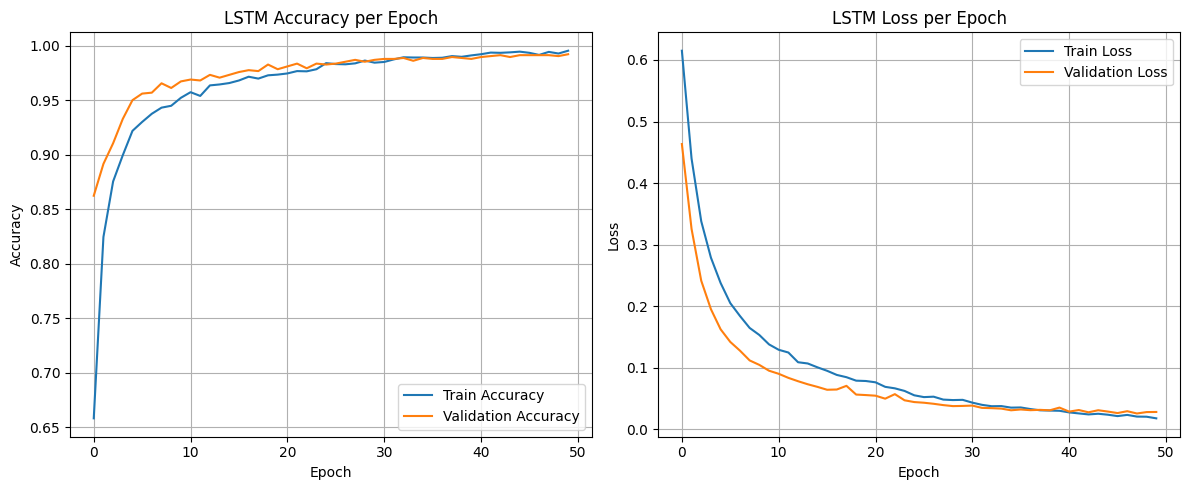


==== Summary for LSTM (over 5 runs) ====
Accuracy: 0.9881 ± 0.0038
Precision: 0.9883 ± 0.0033
Recall: 0.9880 ± 0.0047
F1: 0.9881 ± 0.0038
Auc: 0.9993 ± 0.0002


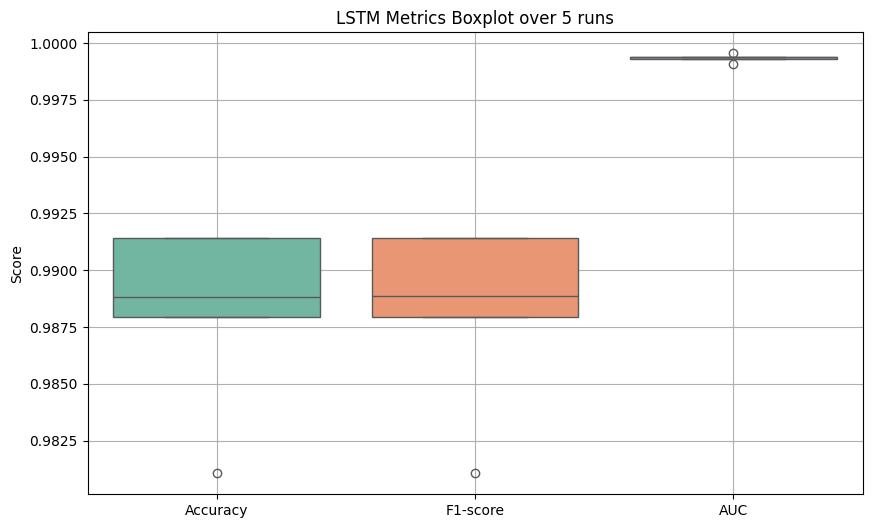


==== Training model: GRU ====
 Run 1/5
Epoch 1/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.5536 - loss: 0.6869 - val_accuracy: 0.7825 - val_loss: 0.5474
Epoch 2/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7477 - loss: 0.5291 - val_accuracy: 0.8796 - val_loss: 0.3675
Epoch 3/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8502 - loss: 0.3854 - val_accuracy: 0.9114 - val_loss: 0.2780
Epoch 4/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8869 - loss: 0.2996 - val_accuracy: 0.9183 - val_loss: 0.2279
Epoch 5/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9223 - loss: 0.2406 - val_accuracy: 0.9304 - val_loss: 0.1906
Epoch 6/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9250 - loss: 0.2101 - val_accuracy: 0.9364 - val_loss: 0.1634
Epoch 7/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9364 - loss: 0.1791 - val_accuracy: 0.9433 - val_loss: 0.1488
Epoch 8/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 

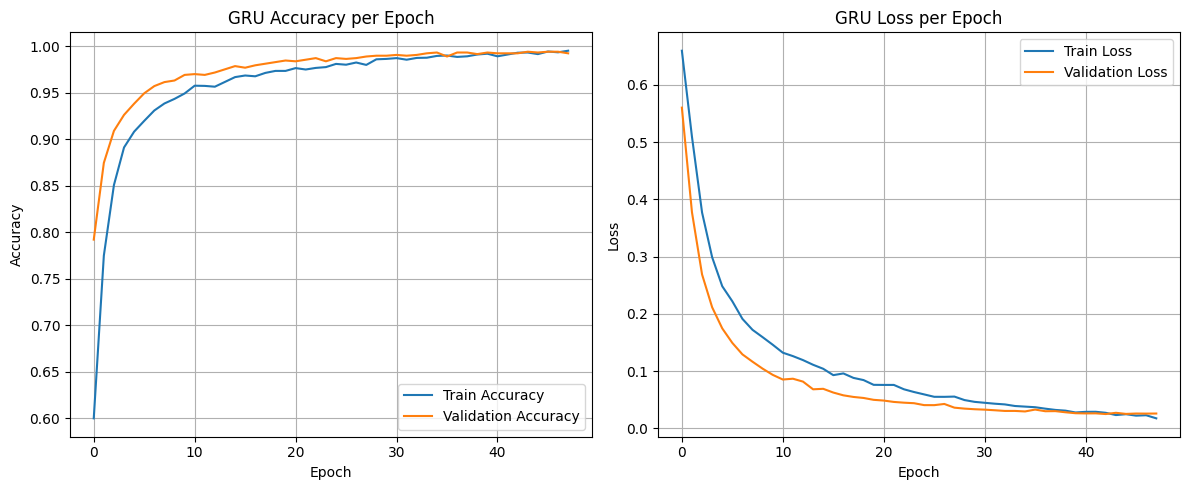


==== Summary for GRU (over 5 runs) ====
Accuracy: 0.9909 ± 0.0021
Precision: 0.9901 ± 0.0013
Recall: 0.9918 ± 0.0033
F1: 0.9909 ± 0.0021
Auc: 0.9995 ± 0.0001


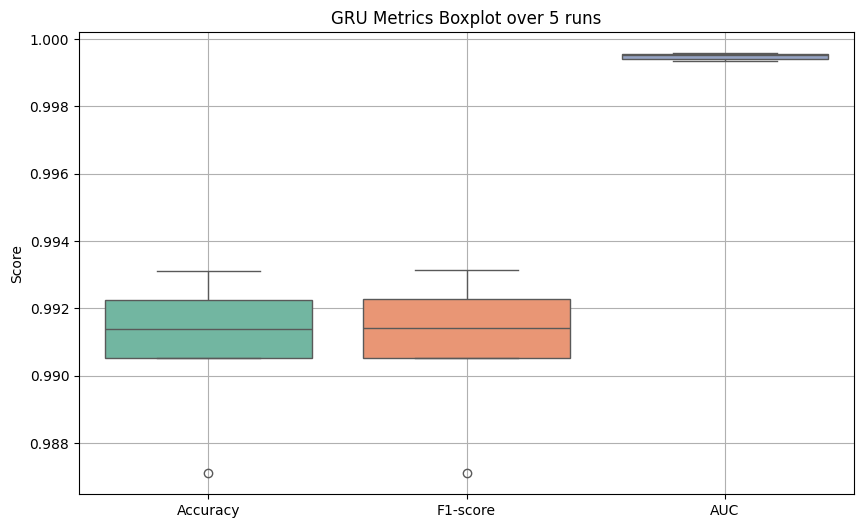


==== Training model: LSTM_GRU ====
 Run 1/5
Epoch 1/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.5176 - loss: 0.7049 - val_accuracy: 0.6905 - val_loss: 0.6659
Epoch 2/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6149 - loss: 0.6597 - val_accuracy: 0.7429 - val_loss: 0.5980
Epoch 3/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7021 - loss: 0.5956 - val_accuracy: 0.8616 - val_loss: 0.4617
Epoch 4/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8042 - loss: 0.4816 - val_accuracy: 0.8899 - val_loss: 0.3416
Epoch 5/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8585 - loss: 0.3747 - val_accuracy: 0.9054 - val_loss: 0.2697
Epoch 6/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8965 - loss: 0.2988 - val_accuracy: 0.9123 - val_loss: 0.2165
Epoch 7/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9186 - loss: 0.2404 - val_accuracy: 0.9278 - val_loss: 0.1818
Epoch 8/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accu

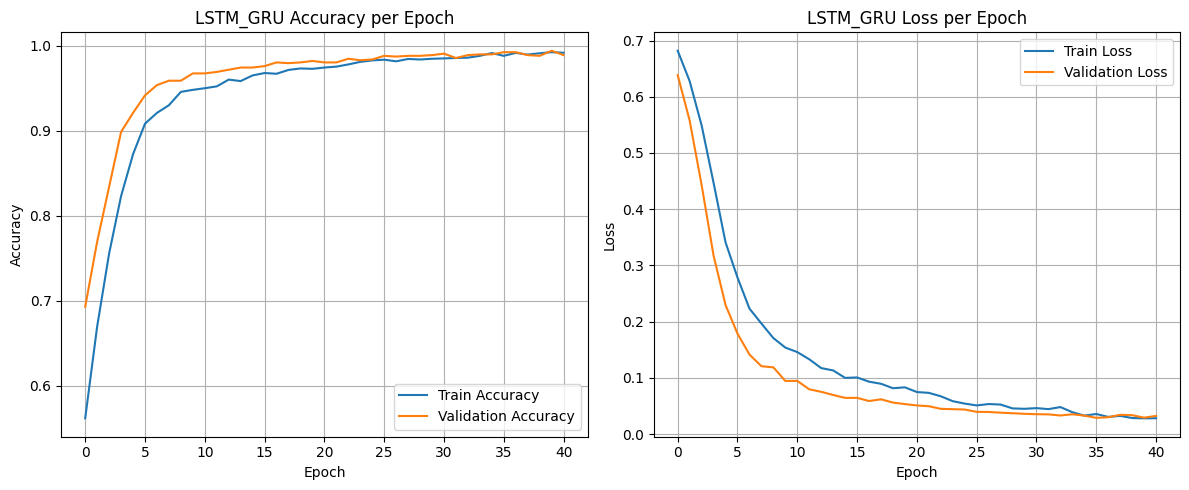


==== Summary for LSTM_GRU (over 5 runs) ====
Accuracy: 0.9888 ± 0.0061
Precision: 0.9883 ± 0.0068
Recall: 0.9893 ± 0.0064
F1: 0.9888 ± 0.0061
Auc: 0.9993 ± 0.0003


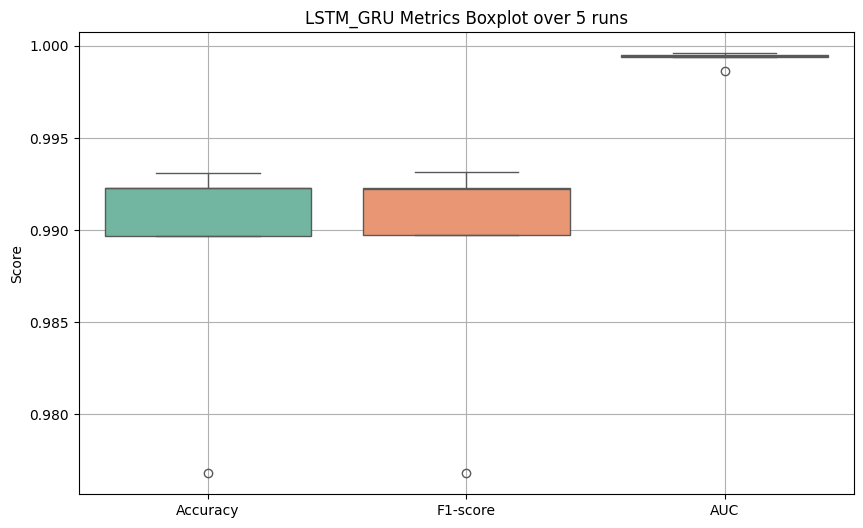


==== Training model: SimpleRNN ====
 Run 1/5
Epoch 1/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.5368 - loss: 0.7540 - val_accuracy: 0.7850 - val_loss: 0.4908
Epoch 2/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7437 - loss: 0.4982 - val_accuracy: 0.8590 - val_loss: 0.3707
Epoch 3/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8099 - loss: 0.4089 - val_accuracy: 0.8745 - val_loss: 0.3090
Epoch 4/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8448 - loss: 0.3468 - val_accuracy: 0.8968 - val_loss: 0.2674
Epoch 5/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8755 - loss: 0.2931 - val_accuracy: 0.9071 - val_loss: 0.2331
Epoch 6/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8861 - loss: 0.2616 - val_accuracy: 0.9192 - val_loss: 0.2146
Epoch 7/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9019 - loss: 0.2423 - val_accuracy: 0.9226 - val_loss: 0.1893
Epoch 8/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accu

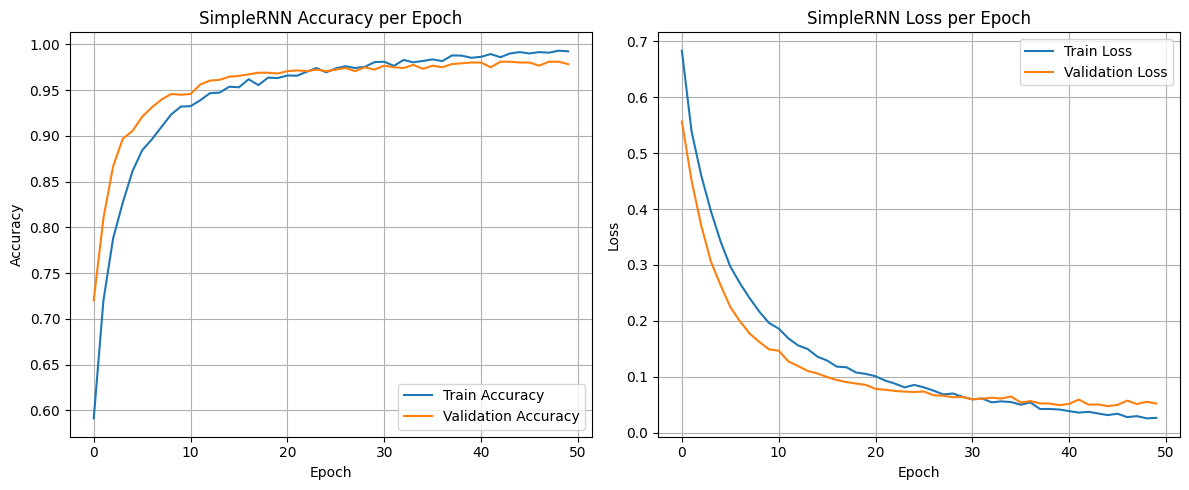


==== Summary for SimpleRNN (over 5 runs) ====
Accuracy: 0.9797 ± 0.0055
Precision: 0.9804 ± 0.0032
Recall: 0.9790 ± 0.0089
F1: 0.9797 ± 0.0056
Auc: 0.9984 ± 0.0005


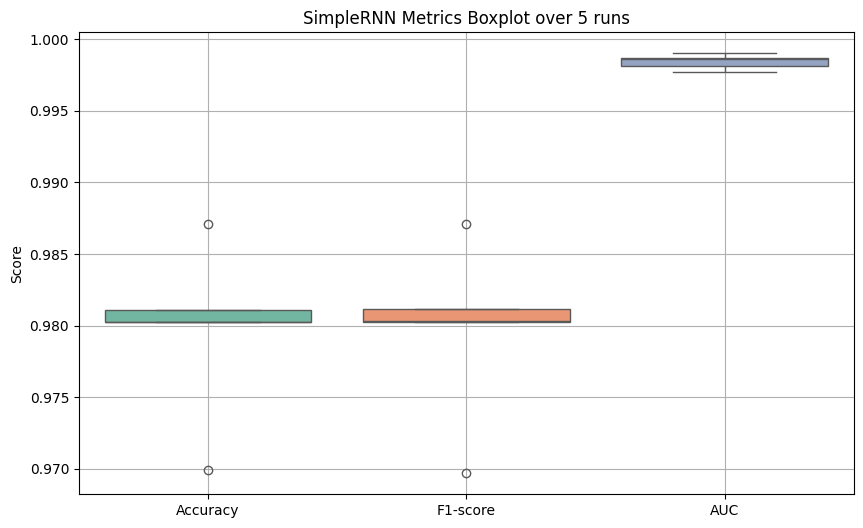


==== Training model: Dense ====
 Run 1/5
Epoch 1/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5510 - loss: 0.6822 - val_accuracy: 0.7515 - val_loss: 0.5647
Epoch 2/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6929 - loss: 0.5683 - val_accuracy: 0.8581 - val_loss: 0.4688
Epoch 3/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7764 - loss: 0.4788 - val_accuracy: 0.8676 - val_loss: 0.3695
Epoch 4/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8102 - loss: 0.4266 - val_accuracy: 0.8676 - val_loss: 0.3229
Epoch 5/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8492 - loss: 0.3648 - val_accuracy: 0.8899 - val_loss: 0.2949
Epoch 6/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8724 - loss: 0.3131 - val_accuracy: 0.8942 - val_loss: 0.2681
Epoch 7/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8785 - loss: 0.3076 - val_accuracy: 0.9054 - val_loss: 0.2281
Epoch 8/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy

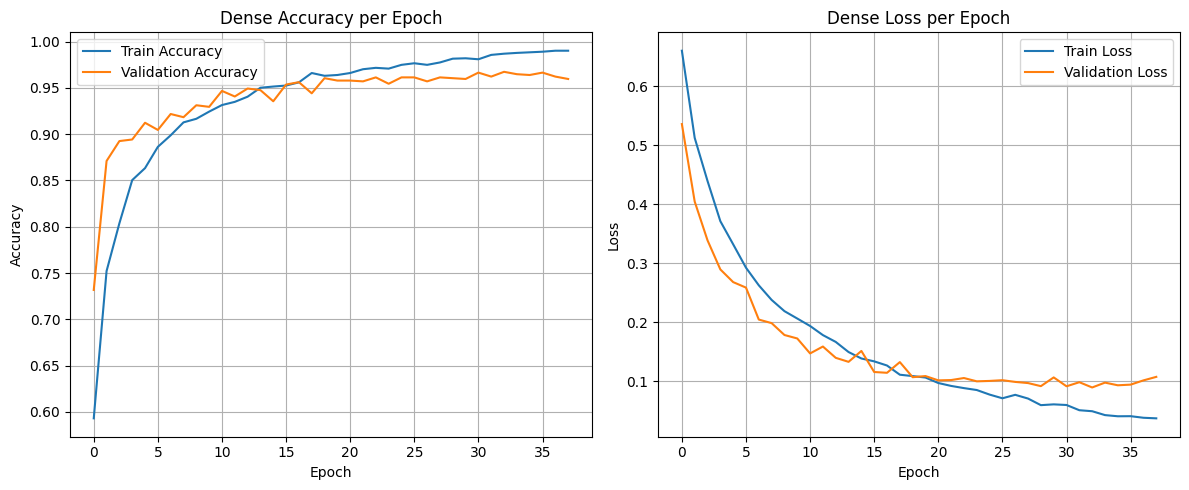


==== Summary for Dense (over 5 runs) ====
Accuracy: 0.9587 ± 0.0084
Precision: 0.9591 ± 0.0110
Recall: 0.9584 ± 0.0064
F1: 0.9588 ± 0.0082
Auc: 0.9943 ± 0.0013


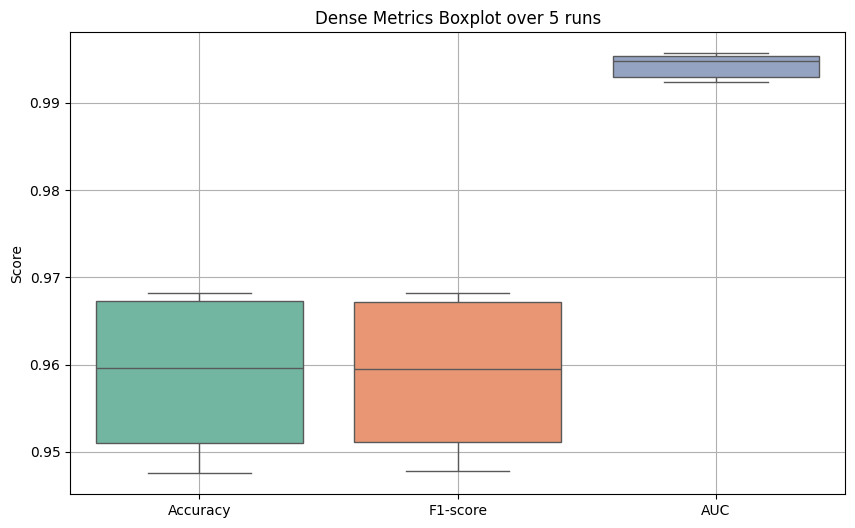


All run results saved to: /content/drive/MyDrive/ped2/results_all_models_poolformer_s12.csv


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout, LSTM, GRU, SimpleRNN, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report,
    roc_curve, precision_recall_curve, auc
)
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import gc
from tensorflow.keras import backend as K

os.environ["CUDA_VISIBLE_DEVICES"] = ""

# --- Data loading and preprocessing ---
def prepare_data(normal_path, anomaly_path):
    X_normal = np.load(normal_path, allow_pickle=True)
    if X_normal.ndim >= 4:
        X_normal = X_normal.mean(axis=(2, 3))
    X_anomaly = np.load(anomaly_path, allow_pickle=True)
    if X_anomaly.ndim >= 4:
        X_anomaly = X_anomaly.mean(axis=(2, 3))
    X = np.concatenate([X_normal, X_anomaly])
    y = np.concatenate([np.zeros(len(X_normal)), np.ones(len(X_anomaly))])
    X = X.astype(np.float32)
    X = np.nan_to_num(X, nan=0.0, posinf=0.0, neginf=0.0)
    X, y = shuffle(X, y, random_state=42)
    return X, y

def create_sequences(X, y, seq_len=5):
    X_seq, y_seq = [], []
    for i in range(len(X) - seq_len + 1):
        X_seq.append(X[i:i + seq_len])
        y_seq.append(y[i + seq_len - 1])
    return np.array(X_seq), np.array(y_seq)

# --- Model builders with 32 and 16 units ---
def build_lstm_model(input_shape):
    inputs = Input(shape=input_shape)
    x = LSTM(32, activation='tanh', recurrent_activation='sigmoid', unroll=True)(inputs)
    x = Dropout(0.3)(x)
    x = Dense(16, activation='relu')(x)
    x = Dropout(0.3)(x)
    outputs = Dense(1, activation='sigmoid')(x)
    model = Model(inputs, outputs)
    model.compile(optimizer=Adam(1e-4), loss='binary_crossentropy', metrics=['accuracy'])
    return model

def build_gru_model(input_shape):
    inputs = Input(shape=input_shape)
    x = GRU(32)(inputs)
    x = Dropout(0.3)(x)
    x = Dense(16, activation='relu')(x)
    x = Dropout(0.3)(x)
    outputs = Dense(1, activation='sigmoid')(x)
    model = Model(inputs, outputs)
    model.compile(optimizer=Adam(1e-4), loss='binary_crossentropy', metrics=['accuracy'])
    return model

def build_lstm_gru_model(input_shape):
    inputs = Input(shape=input_shape)
    x = LSTM(32, return_sequences=True, unroll=True)(inputs)
    x = Dropout(0.3)(x)
    x = GRU(32)(x)
    x = Dropout(0.3)(x)
    x = Dense(16, activation='relu')(x)
    x = Dropout(0.3)(x)
    outputs = Dense(1, activation='sigmoid')(x)
    model = Model(inputs, outputs)
    model.compile(optimizer=Adam(1e-4), loss='binary_crossentropy', metrics=['accuracy'])
    return model

def build_simple_rnn_model(input_shape):
    inputs = Input(shape=input_shape)
    x = SimpleRNN(32)(inputs)
    x = Dropout(0.3)(x)
    x = Dense(16, activation='relu')(x)
    x = Dropout(0.3)(x)
    outputs = Dense(1, activation='sigmoid')(x)
    model = Model(inputs, outputs)
    model.compile(optimizer=Adam(1e-4), loss='binary_crossentropy', metrics=['accuracy'])
    return model

def build_dense_model(input_shape):
    inputs = Input(shape=input_shape)
    x = Flatten()(inputs)
    x = Dense(32, activation='relu')(x)
    x = Dropout(0.3)(x)
    x = Dense(16, activation='relu')(x)
    x = Dropout(0.3)(x)
    outputs = Dense(1, activation='sigmoid')(x)
    model = Model(inputs, outputs)
    model.compile(optimizer=Adam(1e-4), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# --- Main execution ---
def main():
    feature_model_name = 'poolformer_s12'  # Change if needed
    seq_len = 10
    save_dir = '/content/drive/MyDrive/ped2'  # Change to your data path
    normal_path = f"{save_dir}/normal_features_{feature_model_name}.npy"
    anomaly_path = f"{save_dir}/anomaly_features_{feature_model_name}.npy"

    X, y = prepare_data(normal_path, anomaly_path)
    X_seq, y_seq = create_sequences(X, y, seq_len=seq_len)

    model_builders = {
        "LSTM": build_lstm_model,
        "GRU": build_gru_model,
        "LSTM_GRU": build_lstm_gru_model,
        "SimpleRNN": build_simple_rnn_model,
        "Dense": build_dense_model
    }

    num_runs = 5
    all_results = []

    for model_name, builder in model_builders.items():
        print(f"\n==== Training model: {model_name} ====")

        metrics_list = {
            "accuracy": [],
            "precision": [],
            "recall": [],
            "f1": [],
            "auc": []
        }

        histories = []

        for run in range(num_runs):
            print(f" Run {run+1}/{num_runs}")

            X_train, X_test, y_train, y_test = train_test_split(
                X_seq, y_seq, test_size=0.2, stratify=y_seq, random_state=run
            )

            model = builder(X_train.shape[1:])
            es = EarlyStopping(patience=5, restore_best_weights=True, verbose=0)
            history = model.fit(
                X_train, y_train,
                validation_data=(X_test, y_test),
                epochs=50,
                batch_size=32,
                callbacks=[es],
                verbose=1
            )
            histories.append(history)

            y_prob = model.predict(X_test).ravel()
            y_pred = (y_prob > 0.5).astype(int)

            acc = accuracy_score(y_test, y_pred)
            prec = precision_score(y_test, y_pred, zero_division=0)
            rec = recall_score(y_test, y_pred, zero_division=0)
            f1 = f1_score(y_test, y_pred, zero_division=0)
            auc_score = roc_auc_score(y_test, y_prob)

            # Store metrics
            metrics_list["accuracy"].append(acc)
            metrics_list["precision"].append(prec)
            metrics_list["recall"].append(rec)
            metrics_list["f1"].append(f1)
            metrics_list["auc"].append(auc_score)

            all_results.append({
                "Model": model_name,
                "Run": run + 1,
                "Accuracy": acc,
                "Precision": prec,
                "Recall": rec,
                "F1": f1,
                "AUC": auc_score
            })

            # Clear to save memory
            K.clear_session()
            del model
            gc.collect()

        # Plot training curves for last run
        last_history = histories[-1]
        plt.figure(figsize=(12,5))
        plt.subplot(1,2,1)
        plt.plot(last_history.history['accuracy'], label='Train Accuracy')
        plt.plot(last_history.history['val_accuracy'], label='Validation Accuracy')
        plt.title(f'{model_name} Accuracy per Epoch')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.grid(True)

        plt.subplot(1,2,2)
        plt.plot(last_history.history['loss'], label='Train Loss')
        plt.plot(last_history.history['val_loss'], label='Validation Loss')
        plt.title(f'{model_name} Loss per Epoch')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        plt.grid(True)

        plt.tight_layout()
        plt.show()

        # Print mean ± std summary for all runs
        print(f"\n==== Summary for {model_name} (over {num_runs} runs) ====")
        for metric in metrics_list:
            mean_val = np.mean(metrics_list[metric])
            std_val = np.std(metrics_list[metric])
            print(f"{metric.capitalize()}: {mean_val:.4f} ± {std_val:.4f}")

        # Plot boxplots of the 5 runs for metrics
        plt.figure(figsize=(10,6))
        sns.boxplot(data=[metrics_list["accuracy"], metrics_list["f1"], metrics_list["auc"]],
                    palette="Set2")
        plt.xticks([0,1,2], ['Accuracy', 'F1-score', 'AUC'])
        plt.title(f'{model_name} Metrics Boxplot over {num_runs} runs')
        plt.ylabel('Score')
        plt.grid(True)
        plt.show()

    # Save all results to CSV
    df = pd.DataFrame(all_results)
    csv_save_path = os.path.join(save_dir, f"results_all_models_{feature_model_name}.csv")
    df.to_csv(csv_save_path, index=False)
    print(f"\nAll run results saved to: {csv_save_path}")

if __name__ == "__main__":
    main()



==== Training model: LSTM ====
 Run 1/5
Epoch 1/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.6011 - loss: 0.6627 - val_accuracy: 0.8212 - val_loss: 0.5374
Epoch 2/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7841 - loss: 0.5285 - val_accuracy: 0.8796 - val_loss: 0.3992
Epoch 3/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8329 - loss: 0.4210 - val_accuracy: 0.8951 - val_loss: 0.3160
Epoch 4/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8742 - loss: 0.3487 - val_accuracy: 0.9089 - val_loss: 0.2698
Epoch 5/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8809 - loss: 0.3031 - val_accuracy: 0.9175 - val_loss: 0.2348
Epoch 6/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8975 - loss: 0.2725 - val_accuracy: 0.9261 - val_loss: 0.2110
Epoch 7/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9099 - loss: 0.2526 - val_accuracy: 0.9269 - val_loss: 0.1856
Epoch 8/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy:

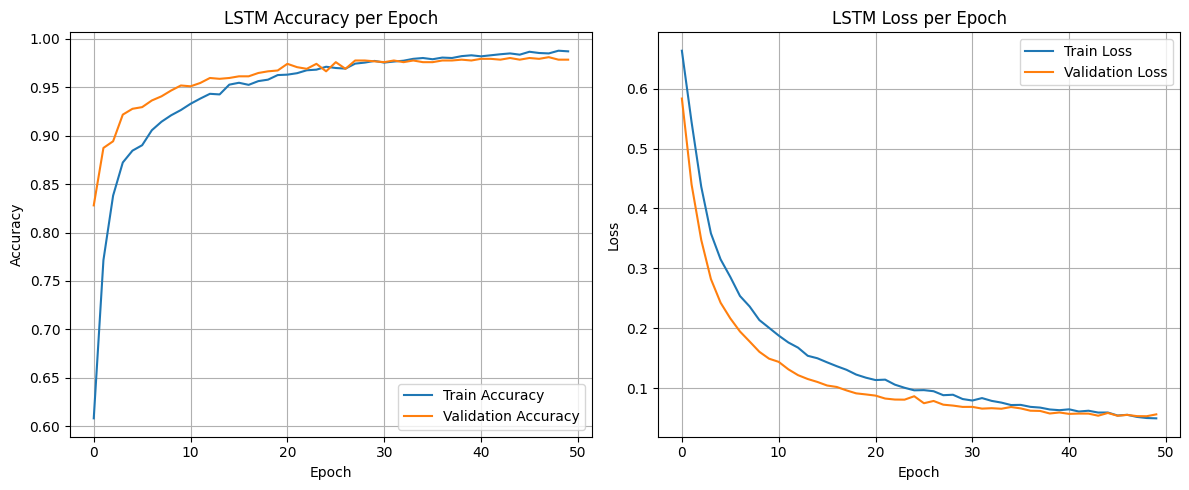


==== Summary for LSTM (over 5 runs) ====
Accuracy: 0.9821 ± 0.0025
Precision: 0.9848 ± 0.0055
Recall: 0.9794 ± 0.0029
F1: 0.9821 ± 0.0024
Auc: 0.9984 ± 0.0007


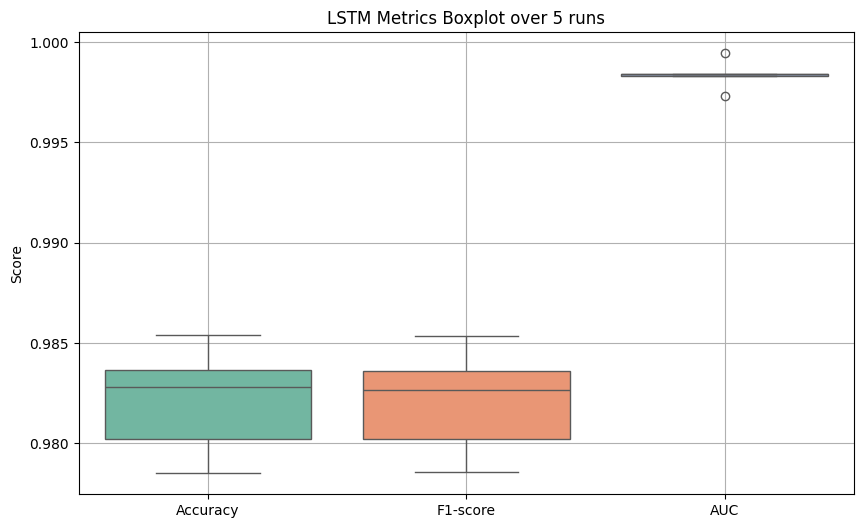


==== Training model: GRU ====
 Run 1/5
Epoch 1/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.5854 - loss: 0.6711 - val_accuracy: 0.8512 - val_loss: 0.4324
Epoch 2/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8313 - loss: 0.4231 - val_accuracy: 0.8856 - val_loss: 0.2866
Epoch 3/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8740 - loss: 0.3124 - val_accuracy: 0.9063 - val_loss: 0.2289
Epoch 4/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9062 - loss: 0.2480 - val_accuracy: 0.9157 - val_loss: 0.1958
Epoch 5/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9141 - loss: 0.2171 - val_accuracy: 0.9235 - val_loss: 0.1744
Epoch 6/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9208 - loss: 0.2043 - val_accuracy: 0.9278 - val_loss: 0.1601
Epoch 7/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9324 - loss: 0.1807 - val_accuracy: 0.9364 - val_loss: 0.1493
Epoch 8/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 

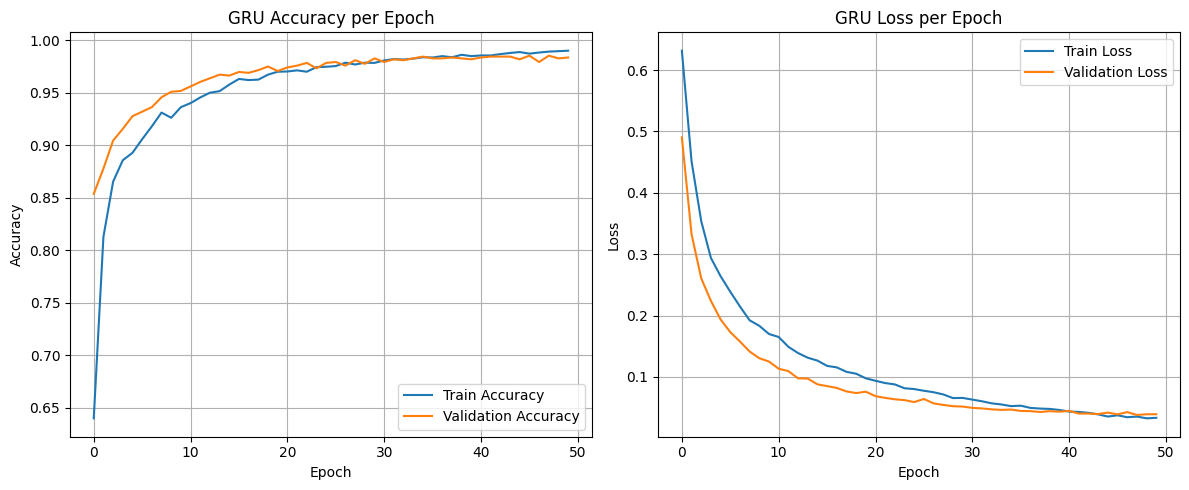


==== Summary for GRU (over 5 runs) ====
Accuracy: 0.9847 ± 0.0017
Precision: 0.9882 ± 0.0027
Recall: 0.9811 ± 0.0029
F1: 0.9847 ± 0.0017
Auc: 0.9991 ± 0.0004


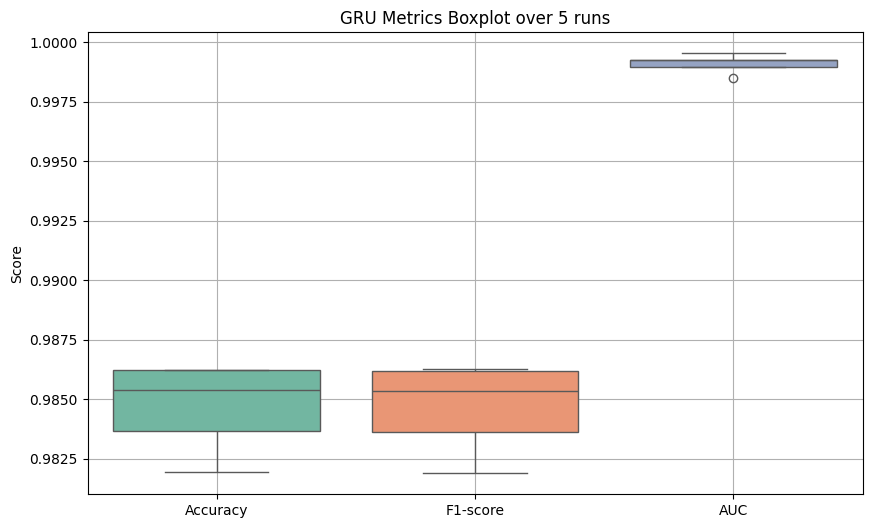


==== Training model: LSTM_GRU ====
 Run 1/5
Epoch 1/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.5563 - loss: 0.6869 - val_accuracy: 0.7481 - val_loss: 0.6354
Epoch 2/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6542 - loss: 0.6264 - val_accuracy: 0.8478 - val_loss: 0.5283
Epoch 3/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7565 - loss: 0.5239 - val_accuracy: 0.8874 - val_loss: 0.3791
Epoch 4/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8407 - loss: 0.4037 - val_accuracy: 0.9046 - val_loss: 0.2782
Epoch 5/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8764 - loss: 0.3288 - val_accuracy: 0.9166 - val_loss: 0.2251
Epoch 6/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8969 - loss: 0.2847 - val_accuracy: 0.9183 - val_loss: 0.1924
Epoch 7/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9146 - loss: 0.2413 - val_accuracy: 0.9441 - val_loss: 0.1637
Epoch 8/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accu

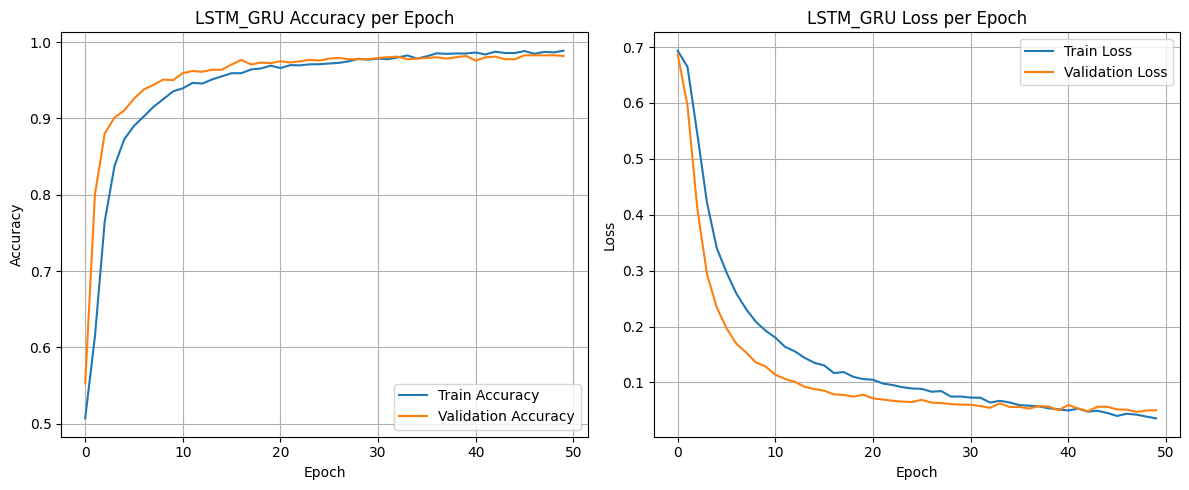


==== Summary for LSTM_GRU (over 5 runs) ====
Accuracy: 0.9828 ± 0.0032
Precision: 0.9865 ± 0.0030
Recall: 0.9790 ± 0.0048
F1: 0.9827 ± 0.0032
Auc: 0.9986 ± 0.0007


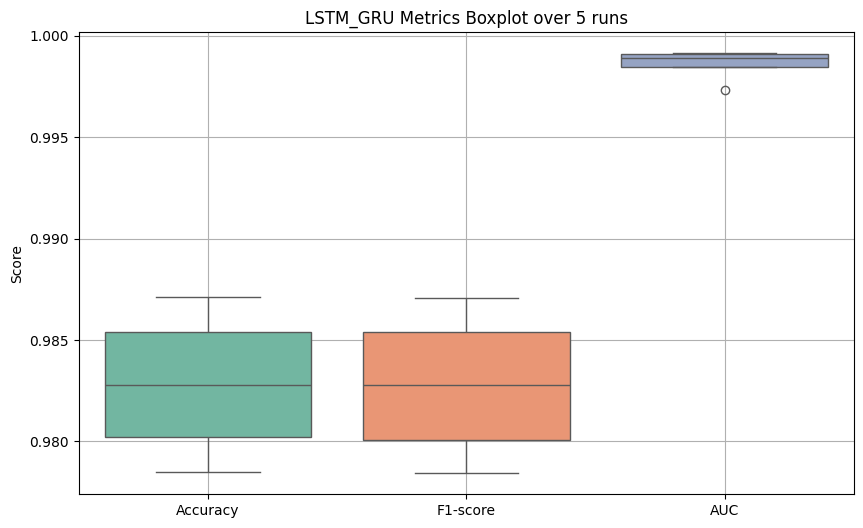


==== Training model: SimpleRNN ====
 Run 1/5
Epoch 1/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6074 - loss: 0.6719 - val_accuracy: 0.8126 - val_loss: 0.4916
Epoch 2/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7457 - loss: 0.5199 - val_accuracy: 0.8607 - val_loss: 0.3739
Epoch 3/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8228 - loss: 0.3995 - val_accuracy: 0.8693 - val_loss: 0.3108
Epoch 4/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8411 - loss: 0.3538 - val_accuracy: 0.8899 - val_loss: 0.2624
Epoch 5/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8670 - loss: 0.3085 - val_accuracy: 0.8934 - val_loss: 0.2360
Epoch 6/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8821 - loss: 0.2862 - val_accuracy: 0.9080 - val_loss: 0.2144
Epoch 7/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8954 - loss: 0.2522 - val_accuracy: 0.9192 - val_loss: 0.1994
Epoch 8/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accu

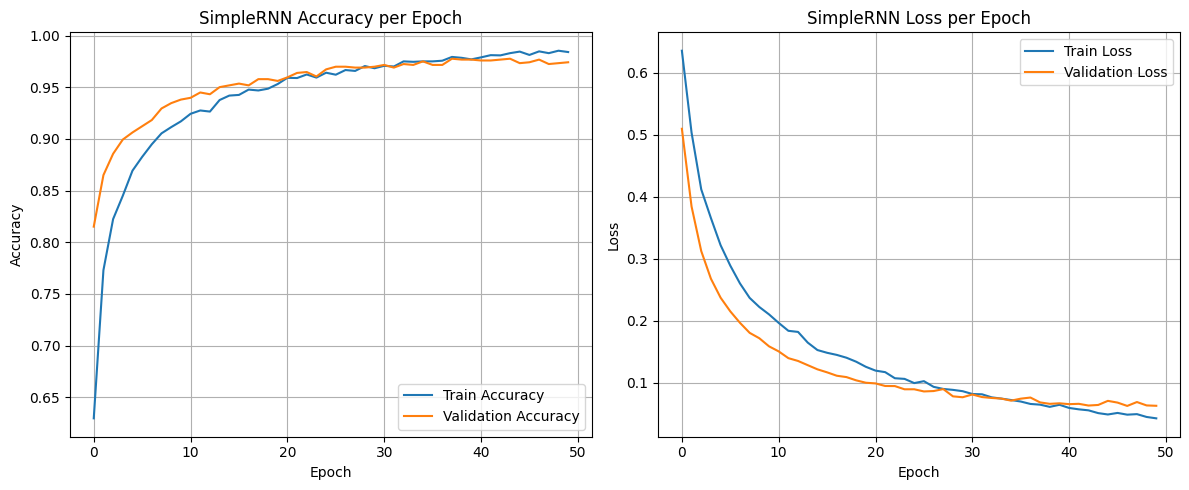


==== Summary for SimpleRNN (over 5 runs) ====
Accuracy: 0.9728 ± 0.0080
Precision: 0.9764 ± 0.0056
Recall: 0.9691 ± 0.0118
F1: 0.9727 ± 0.0081
Auc: 0.9963 ± 0.0023


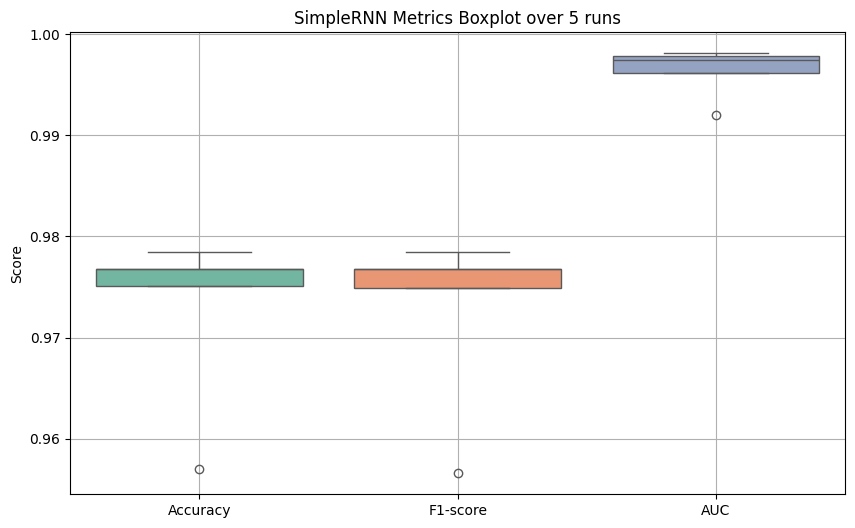


==== Training model: Dense ====
 Run 1/5
Epoch 1/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5292 - loss: 0.6991 - val_accuracy: 0.6518 - val_loss: 0.6084
Epoch 2/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6720 - loss: 0.6087 - val_accuracy: 0.8598 - val_loss: 0.4887
Epoch 3/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7627 - loss: 0.5063 - val_accuracy: 0.8573 - val_loss: 0.4424
Epoch 4/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8078 - loss: 0.4490 - val_accuracy: 0.8788 - val_loss: 0.3381
Epoch 5/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8459 - loss: 0.3855 - val_accuracy: 0.8779 - val_loss: 0.3106
Epoch 6/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8481 - loss: 0.3564 - val_accuracy: 0.8762 - val_loss: 0.2818
Epoch 7/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8586 - loss: 0.3359 - val_accuracy: 0.8848 - val_loss: 0.2691
Epoch 8/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy

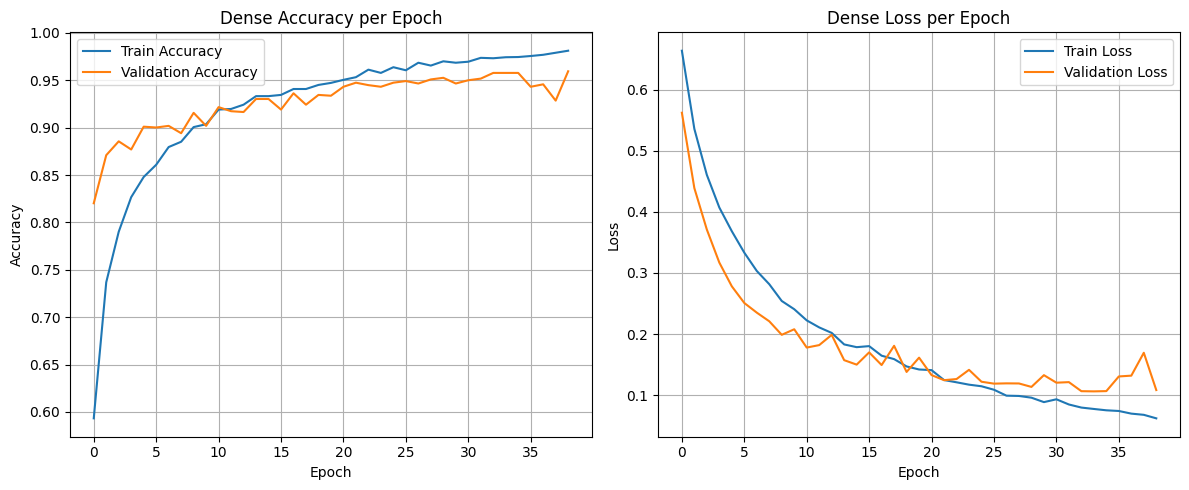


==== Summary for Dense (over 5 runs) ====
Accuracy: 0.9537 ± 0.0101
Precision: 0.9600 ± 0.0113
Recall: 0.9471 ± 0.0110
F1: 0.9535 ± 0.0102
Auc: 0.9918 ± 0.0029


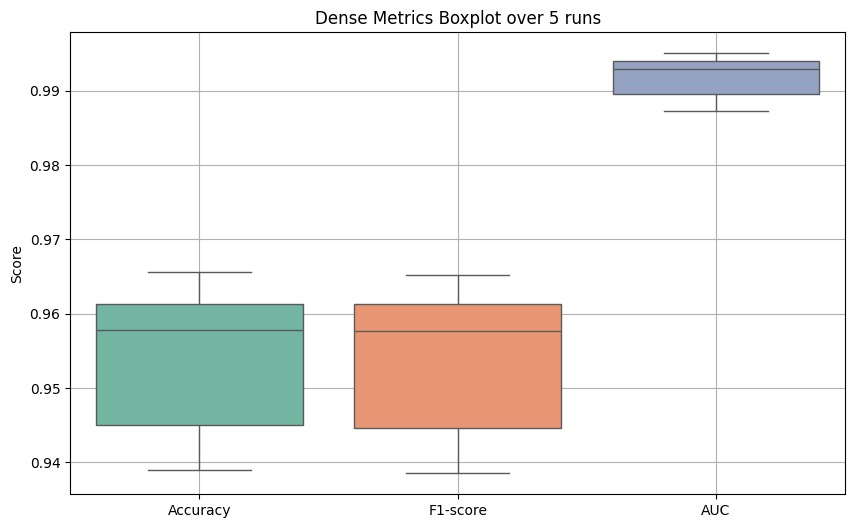


All run results saved to: /content/drive/MyDrive/ped2/results_all_models_maxvit_tiny_tf_224.csv


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout, LSTM, GRU, SimpleRNN, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report,
    roc_curve, precision_recall_curve, auc
)
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import gc
from tensorflow.keras import backend as K

os.environ["CUDA_VISIBLE_DEVICES"] = ""

# --- Data loading and preprocessing ---
def prepare_data(normal_path, anomaly_path):
    X_normal = np.load(normal_path, allow_pickle=True)
    if X_normal.ndim >= 4:
        X_normal = X_normal.mean(axis=(2, 3))
    X_anomaly = np.load(anomaly_path, allow_pickle=True)
    if X_anomaly.ndim >= 4:
        X_anomaly = X_anomaly.mean(axis=(2, 3))
    X = np.concatenate([X_normal, X_anomaly])
    y = np.concatenate([np.zeros(len(X_normal)), np.ones(len(X_anomaly))])
    X = X.astype(np.float32)
    X = np.nan_to_num(X, nan=0.0, posinf=0.0, neginf=0.0)
    X, y = shuffle(X, y, random_state=42)
    return X, y

def create_sequences(X, y, seq_len=5):
    X_seq, y_seq = [], []
    for i in range(len(X) - seq_len + 1):
        X_seq.append(X[i:i + seq_len])
        y_seq.append(y[i + seq_len - 1])
    return np.array(X_seq), np.array(y_seq)

# --- Model builders with 32 and 16 units ---
def build_lstm_model(input_shape):
    inputs = Input(shape=input_shape)
    x = LSTM(32, activation='tanh', recurrent_activation='sigmoid', unroll=True)(inputs)
    x = Dropout(0.3)(x)
    x = Dense(16, activation='relu')(x)
    x = Dropout(0.3)(x)
    outputs = Dense(1, activation='sigmoid')(x)
    model = Model(inputs, outputs)
    model.compile(optimizer=Adam(1e-4), loss='binary_crossentropy', metrics=['accuracy'])
    return model

def build_gru_model(input_shape):
    inputs = Input(shape=input_shape)
    x = GRU(32)(inputs)
    x = Dropout(0.3)(x)
    x = Dense(16, activation='relu')(x)
    x = Dropout(0.3)(x)
    outputs = Dense(1, activation='sigmoid')(x)
    model = Model(inputs, outputs)
    model.compile(optimizer=Adam(1e-4), loss='binary_crossentropy', metrics=['accuracy'])
    return model

def build_lstm_gru_model(input_shape):
    inputs = Input(shape=input_shape)
    x = LSTM(32, return_sequences=True, unroll=True)(inputs)
    x = Dropout(0.3)(x)
    x = GRU(32)(x)
    x = Dropout(0.3)(x)
    x = Dense(16, activation='relu')(x)
    x = Dropout(0.3)(x)
    outputs = Dense(1, activation='sigmoid')(x)
    model = Model(inputs, outputs)
    model.compile(optimizer=Adam(1e-4), loss='binary_crossentropy', metrics=['accuracy'])
    return model

def build_simple_rnn_model(input_shape):
    inputs = Input(shape=input_shape)
    x = SimpleRNN(32)(inputs)
    x = Dropout(0.3)(x)
    x = Dense(16, activation='relu')(x)
    x = Dropout(0.3)(x)
    outputs = Dense(1, activation='sigmoid')(x)
    model = Model(inputs, outputs)
    model.compile(optimizer=Adam(1e-4), loss='binary_crossentropy', metrics=['accuracy'])
    return model

def build_dense_model(input_shape):
    inputs = Input(shape=input_shape)
    x = Flatten()(inputs)
    x = Dense(32, activation='relu')(x)
    x = Dropout(0.3)(x)
    x = Dense(16, activation='relu')(x)
    x = Dropout(0.3)(x)
    outputs = Dense(1, activation='sigmoid')(x)
    model = Model(inputs, outputs)
    model.compile(optimizer=Adam(1e-4), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# --- Main execution ---
def main():
    feature_model_name = 'maxvit_tiny_tf_224'  # Change if needed
    seq_len = 10
    save_dir = '/content/drive/MyDrive/ped2'  # Change to your data path
    normal_path = f"{save_dir}/normal_features_{feature_model_name}.npy"
    anomaly_path = f"{save_dir}/anomaly_features_{feature_model_name}.npy"

    X, y = prepare_data(normal_path, anomaly_path)
    X_seq, y_seq = create_sequences(X, y, seq_len=seq_len)

    model_builders = {
        "LSTM": build_lstm_model,
        "GRU": build_gru_model,
        "LSTM_GRU": build_lstm_gru_model,
        "SimpleRNN": build_simple_rnn_model,
        "Dense": build_dense_model
    }

    num_runs = 5
    all_results = []

    for model_name, builder in model_builders.items():
        print(f"\n==== Training model: {model_name} ====")

        metrics_list = {
            "accuracy": [],
            "precision": [],
            "recall": [],
            "f1": [],
            "auc": []
        }

        histories = []

        for run in range(num_runs):
            print(f" Run {run+1}/{num_runs}")

            X_train, X_test, y_train, y_test = train_test_split(
                X_seq, y_seq, test_size=0.2, stratify=y_seq, random_state=run
            )

            model = builder(X_train.shape[1:])
            es = EarlyStopping(patience=5, restore_best_weights=True, verbose=0)
            history = model.fit(
                X_train, y_train,
                validation_data=(X_test, y_test),
                epochs=50,
                batch_size=32,
                callbacks=[es],
                verbose=1
            )
            histories.append(history)

            y_prob = model.predict(X_test).ravel()
            y_pred = (y_prob > 0.5).astype(int)

            acc = accuracy_score(y_test, y_pred)
            prec = precision_score(y_test, y_pred, zero_division=0)
            rec = recall_score(y_test, y_pred, zero_division=0)
            f1 = f1_score(y_test, y_pred, zero_division=0)
            auc_score = roc_auc_score(y_test, y_prob)

            # Store metrics
            metrics_list["accuracy"].append(acc)
            metrics_list["precision"].append(prec)
            metrics_list["recall"].append(rec)
            metrics_list["f1"].append(f1)
            metrics_list["auc"].append(auc_score)

            all_results.append({
                "Model": model_name,
                "Run": run + 1,
                "Accuracy": acc,
                "Precision": prec,
                "Recall": rec,
                "F1": f1,
                "AUC": auc_score
            })

            # Clear to save memory
            K.clear_session()
            del model
            gc.collect()

        # Plot training curves for last run
        last_history = histories[-1]
        plt.figure(figsize=(12,5))
        plt.subplot(1,2,1)
        plt.plot(last_history.history['accuracy'], label='Train Accuracy')
        plt.plot(last_history.history['val_accuracy'], label='Validation Accuracy')
        plt.title(f'{model_name} Accuracy per Epoch')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.grid(True)

        plt.subplot(1,2,2)
        plt.plot(last_history.history['loss'], label='Train Loss')
        plt.plot(last_history.history['val_loss'], label='Validation Loss')
        plt.title(f'{model_name} Loss per Epoch')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        plt.grid(True)

        plt.tight_layout()
        plt.show()

        # Print mean ± std summary for all runs
        print(f"\n==== Summary for {model_name} (over {num_runs} runs) ====")
        for metric in metrics_list:
            mean_val = np.mean(metrics_list[metric])
            std_val = np.std(metrics_list[metric])
            print(f"{metric.capitalize()}: {mean_val:.4f} ± {std_val:.4f}")

        # Plot boxplots of the 5 runs for metrics
        plt.figure(figsize=(10,6))
        sns.boxplot(data=[metrics_list["accuracy"], metrics_list["f1"], metrics_list["auc"]],
                    palette="Set2")
        plt.xticks([0,1,2], ['Accuracy', 'F1-score', 'AUC'])
        plt.title(f'{model_name} Metrics Boxplot over {num_runs} runs')
        plt.ylabel('Score')
        plt.grid(True)
        plt.show()

    # Save all results to CSV
    df = pd.DataFrame(all_results)
    csv_save_path = os.path.join(save_dir, f"results_all_models_{feature_model_name}.csv")
    df.to_csv(csv_save_path, index=False)
    print(f"\nAll run results saved to: {csv_save_path}")

if __name__ == "__main__":
    main()



==== Training model: LSTM ====
 Run 1/5
Epoch 1/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.6530 - loss: 0.6172 - val_accuracy: 0.9114 - val_loss: 0.3389
Epoch 2/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8885 - loss: 0.3343 - val_accuracy: 0.9269 - val_loss: 0.2135
Epoch 3/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9205 - loss: 0.2479 - val_accuracy: 0.9390 - val_loss: 0.1670
Epoch 4/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9355 - loss: 0.2026 - val_accuracy: 0.9433 - val_loss: 0.1425
Epoch 5/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9500 - loss: 0.1686 - val_accuracy: 0.9536 - val_loss: 0.1237
Epoch 6/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9576 - loss: 0.1442 - val_accuracy: 0.9579 - val_loss: 0.1065
Epoch 7/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9568 - loss: 0.1324 - val_accuracy: 0.9647 - val_loss: 0.0962
Epoch 8/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accura

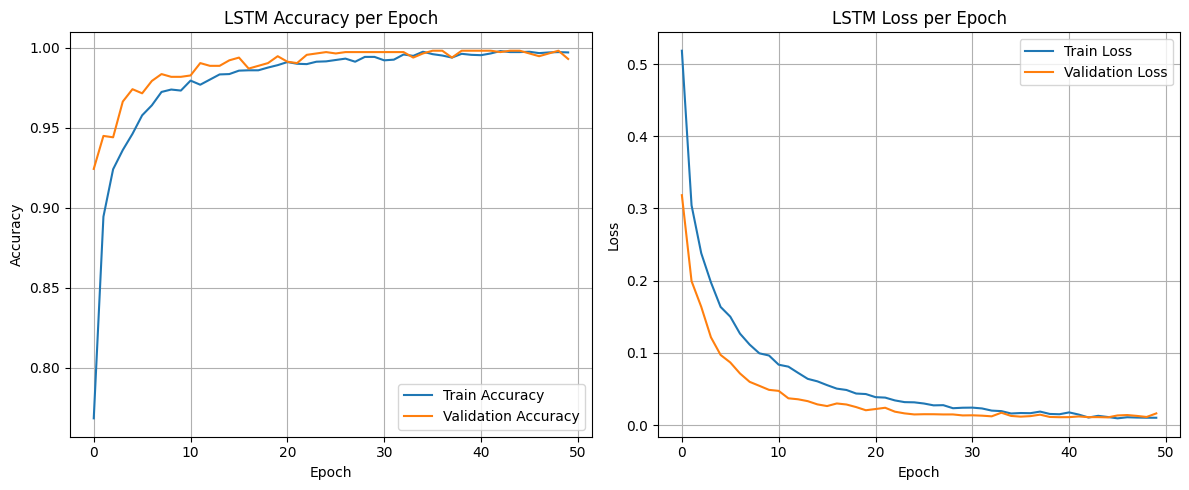


==== Summary for LSTM (over 5 runs) ====
Accuracy: 0.9936 ± 0.0037
Precision: 0.9948 ± 0.0031
Recall: 0.9924 ± 0.0059
F1: 0.9936 ± 0.0037
Auc: 0.9997 ± 0.0002


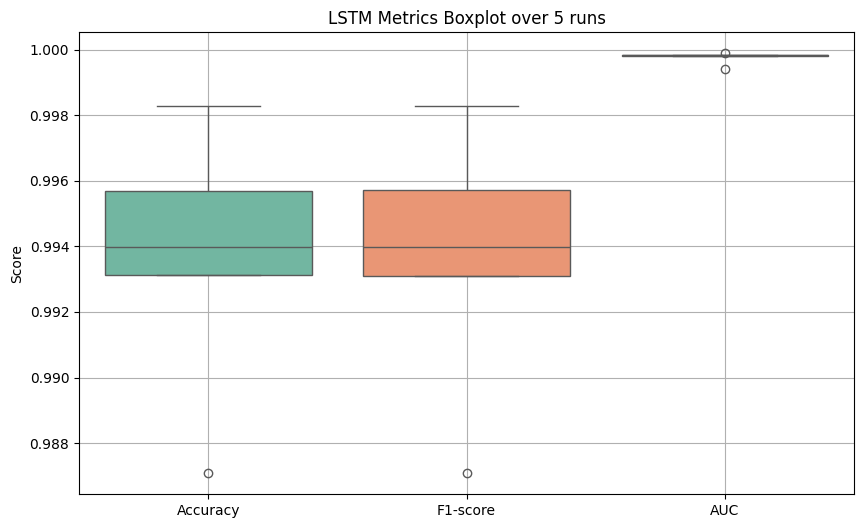


==== Training model: GRU ====
 Run 1/5
Epoch 1/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.6108 - loss: 0.6793 - val_accuracy: 0.9166 - val_loss: 0.3478
Epoch 2/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.8635 - loss: 0.3595 - val_accuracy: 0.9338 - val_loss: 0.2535
Epoch 3/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9042 - loss: 0.2801 - val_accuracy: 0.9407 - val_loss: 0.2060
Epoch 4/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9282 - loss: 0.2346 - val_accuracy: 0.9493 - val_loss: 0.1740
Epoch 5/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9365 - loss: 0.2049 - val_accuracy: 0.9561 - val_loss: 0.1507
Epoch 6/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9469 - loss: 0.1814 - val_accuracy: 0.9570 - val_loss: 0.1351
Epoch 7/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9517 - loss: 0.1634 - val_accuracy: 0.9630 - val_loss: 0.1149
Epoch 8/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accu

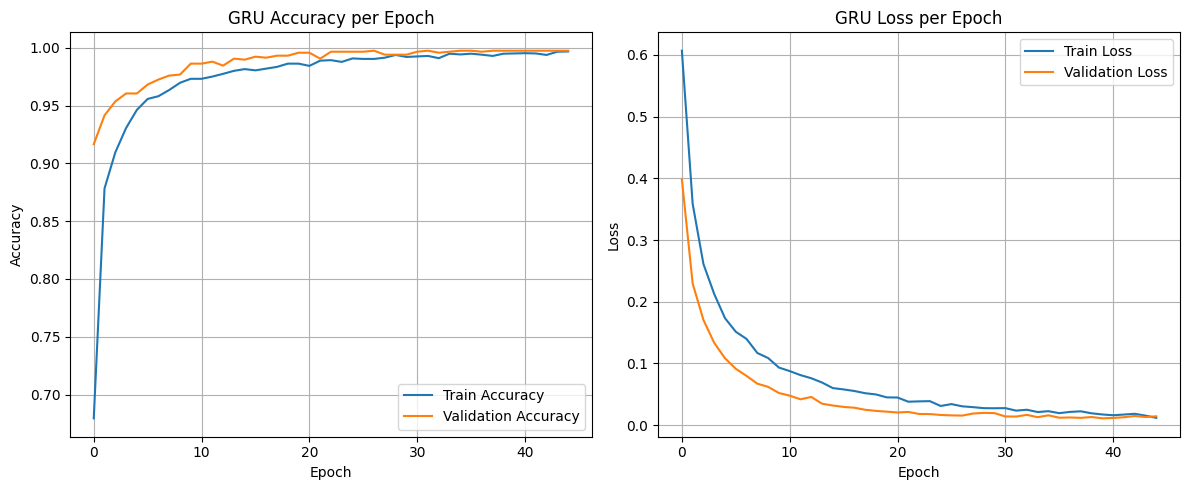


==== Summary for GRU (over 5 runs) ====
Accuracy: 0.9942 ± 0.0025
Precision: 0.9942 ± 0.0026
Recall: 0.9942 ± 0.0028
F1: 0.9942 ± 0.0025
Auc: 0.9998 ± 0.0001


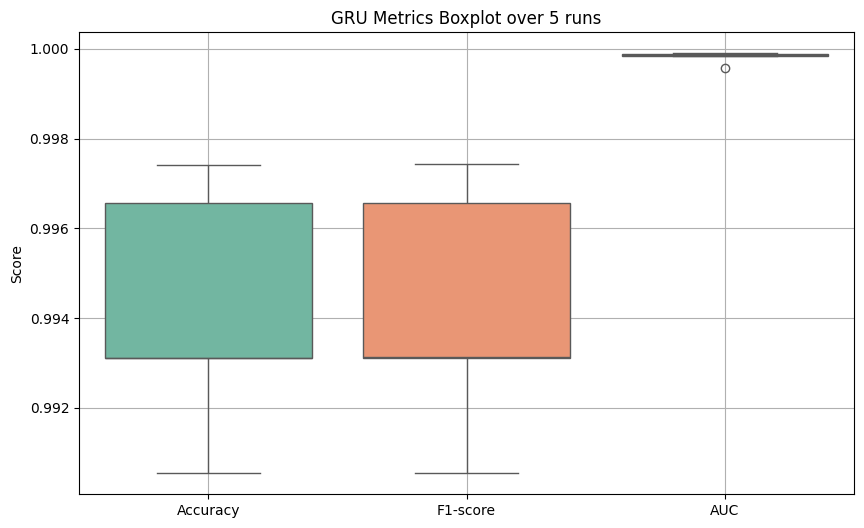


==== Training model: LSTM_GRU ====
 Run 1/5
Epoch 1/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.5415 - loss: 0.6830 - val_accuracy: 0.7945 - val_loss: 0.5710
Epoch 2/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.7466 - loss: 0.5564 - val_accuracy: 0.9106 - val_loss: 0.3975
Epoch 3/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.8470 - loss: 0.4169 - val_accuracy: 0.9338 - val_loss: 0.2665
Epoch 4/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.9073 - loss: 0.3065 - val_accuracy: 0.9398 - val_loss: 0.1827
Epoch 5/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9226 - loss: 0.2338 - val_accuracy: 0.9518 - val_loss: 0.1432
Epoch 6/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9494 - loss: 0.1807 - val_accuracy: 0.9570 - val_loss: 0.1164
Epoch 7/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9588 - loss: 0.1368 - val_accuracy: 0.9570 - val_loss: 0.1007
Epoch 8/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step

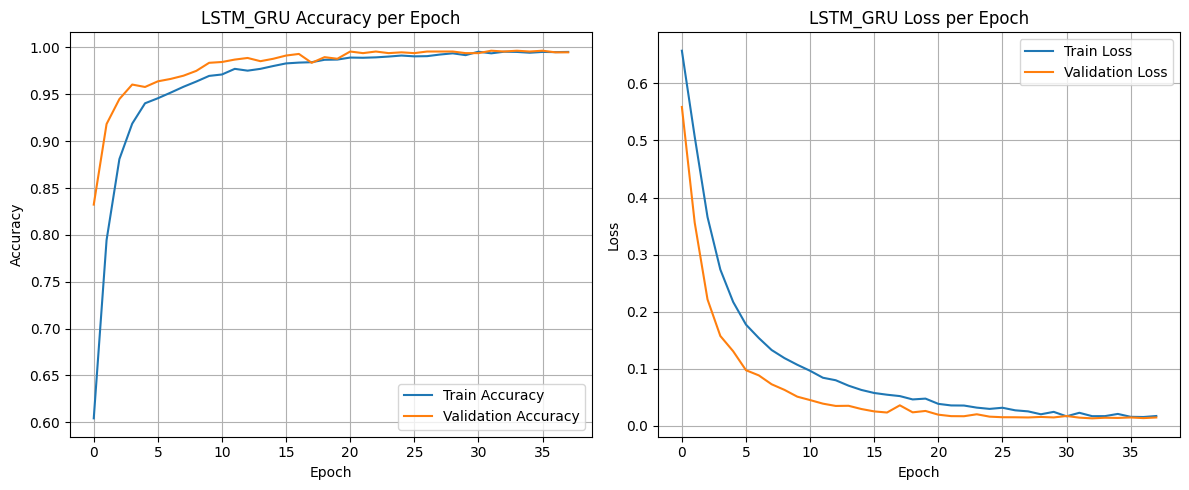


==== Summary for LSTM_GRU (over 5 runs) ====
Accuracy: 0.9935 ± 0.0032
Precision: 0.9918 ± 0.0054
Recall: 0.9952 ± 0.0013
F1: 0.9935 ± 0.0032
Auc: 0.9997 ± 0.0003


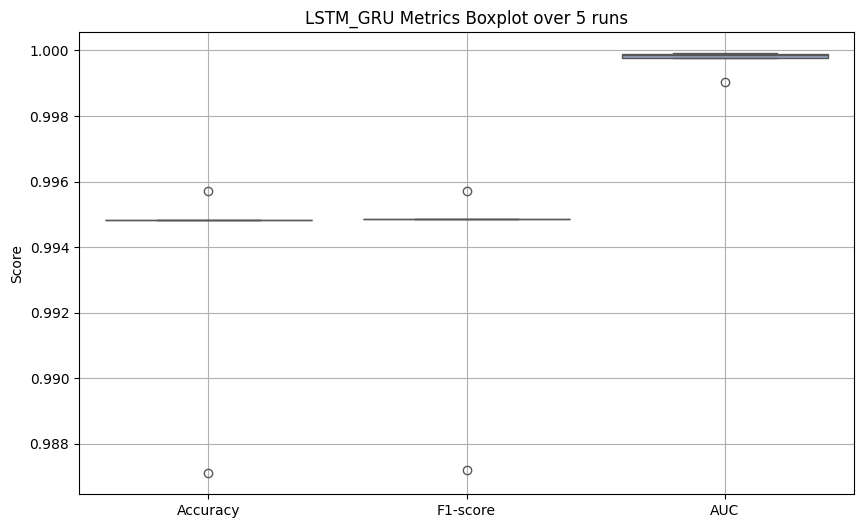


==== Training model: SimpleRNN ====
 Run 1/5
Epoch 1/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.6896 - loss: 0.5923 - val_accuracy: 0.8727 - val_loss: 0.3282
Epoch 2/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8610 - loss: 0.3510 - val_accuracy: 0.9218 - val_loss: 0.2205
Epoch 3/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9025 - loss: 0.2567 - val_accuracy: 0.9295 - val_loss: 0.1718
Epoch 4/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9141 - loss: 0.2104 - val_accuracy: 0.9372 - val_loss: 0.1424
Epoch 5/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9431 - loss: 0.1636 - val_accuracy: 0.9475 - val_loss: 0.1222
Epoch 6/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9374 - loss: 0.1547 - val_accuracy: 0.9544 - val_loss: 0.1100
Epoch 7/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9528 - loss: 0.1340 - val_accuracy: 0.9587 - val_loss: 0.1016
Epoch 8/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - acc

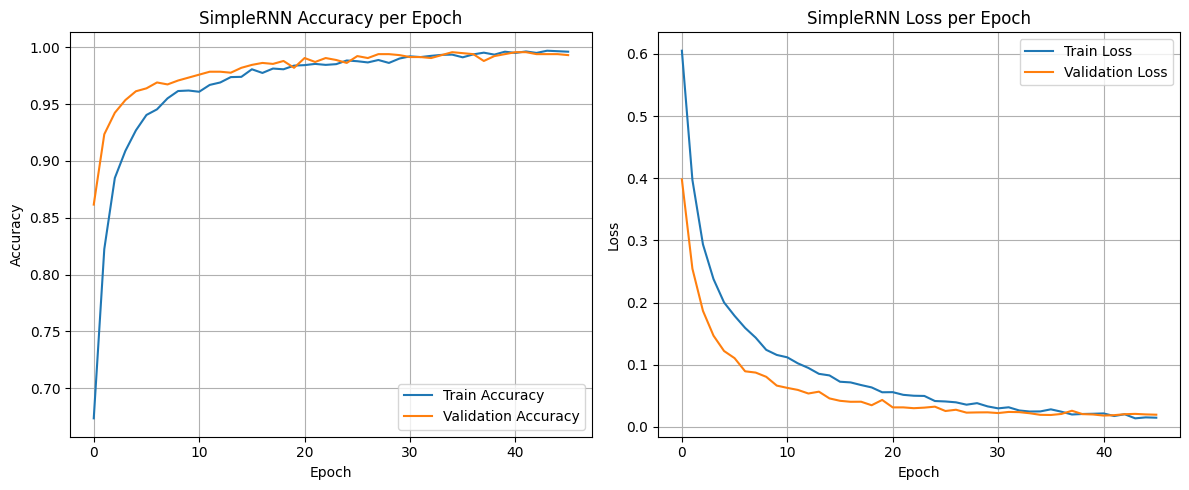


==== Summary for SimpleRNN (over 5 runs) ====
Accuracy: 0.9919 ± 0.0025
Precision: 0.9914 ± 0.0022
Recall: 0.9924 ± 0.0034
F1: 0.9919 ± 0.0025
Auc: 0.9997 ± 0.0001


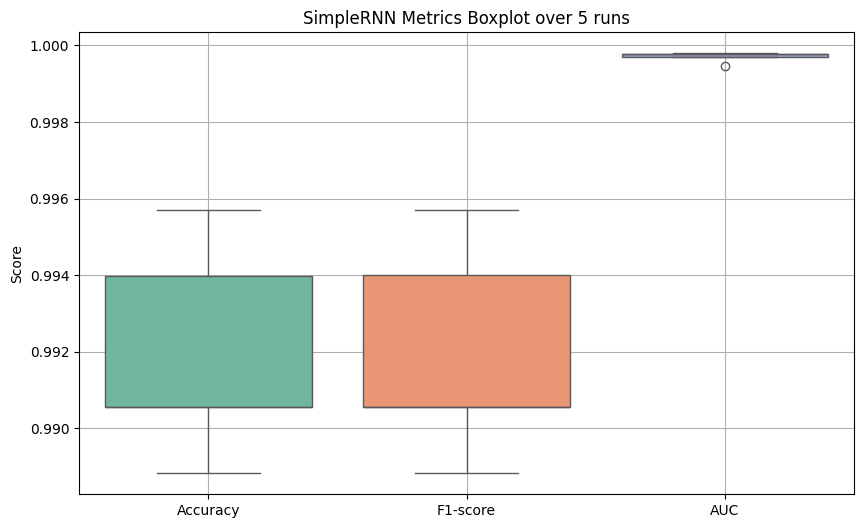


==== Training model: Dense ====
 Run 1/5
Epoch 1/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.5988 - loss: 0.6777 - val_accuracy: 0.8598 - val_loss: 0.4021
Epoch 2/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7984 - loss: 0.4381 - val_accuracy: 0.9054 - val_loss: 0.2729
Epoch 3/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8671 - loss: 0.3158 - val_accuracy: 0.9209 - val_loss: 0.2359
Epoch 4/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8987 - loss: 0.2715 - val_accuracy: 0.9278 - val_loss: 0.1873
Epoch 5/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9172 - loss: 0.2207 - val_accuracy: 0.9295 - val_loss: 0.1687
Epoch 6/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9279 - loss: 0.2016 - val_accuracy: 0.9286 - val_loss: 0.1639
Epoch 7/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9379 - loss: 0.1670 - val_accuracy: 0.9415 - val_loss: 0.1333
Epoch 8/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy

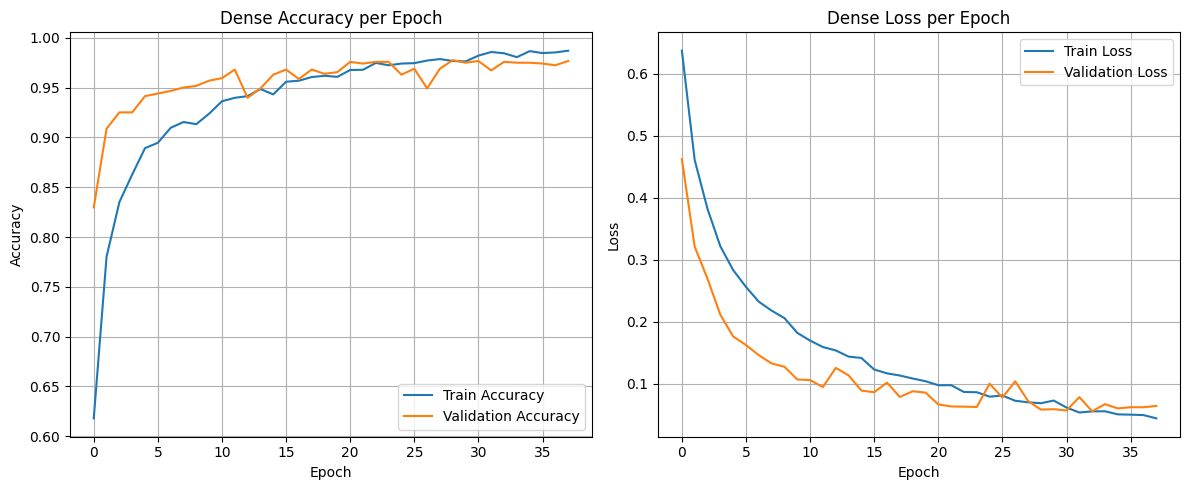


==== Summary for Dense (over 5 runs) ====
Accuracy: 0.9689 ± 0.0054
Precision: 0.9760 ± 0.0076
Recall: 0.9615 ± 0.0063
F1: 0.9687 ± 0.0054
Auc: 0.9967 ± 0.0010


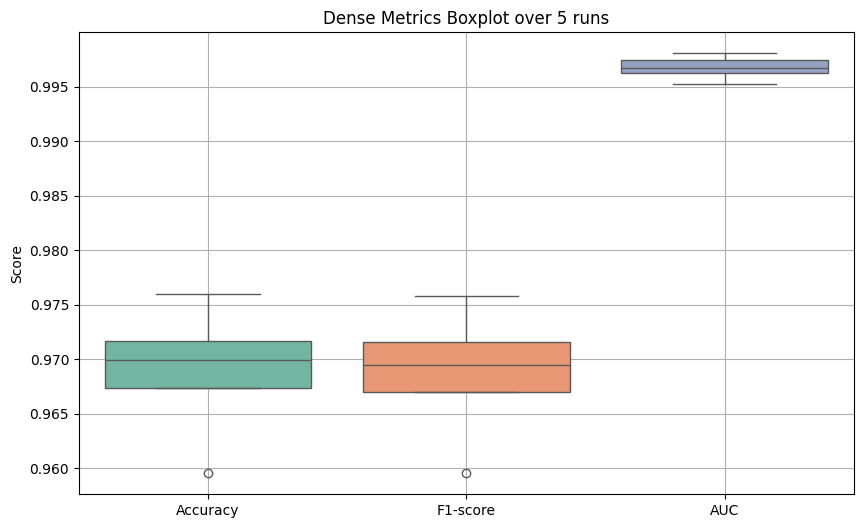


All run results saved to: /content/drive/MyDrive/ped2/results_all_models_coatnet_0_rw_224.csv


In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout, LSTM, GRU, SimpleRNN, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report,
    roc_curve, precision_recall_curve, auc
)
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import gc
from tensorflow.keras import backend as K

os.environ["CUDA_VISIBLE_DEVICES"] = ""

# --- Data loading and preprocessing ---
def prepare_data(normal_path, anomaly_path):
    X_normal = np.load(normal_path, allow_pickle=True)
    if X_normal.ndim >= 4:
        X_normal = X_normal.mean(axis=(2, 3))
    X_anomaly = np.load(anomaly_path, allow_pickle=True)
    if X_anomaly.ndim >= 4:
        X_anomaly = X_anomaly.mean(axis=(2, 3))
    X = np.concatenate([X_normal, X_anomaly])
    y = np.concatenate([np.zeros(len(X_normal)), np.ones(len(X_anomaly))])
    X = X.astype(np.float32)
    X = np.nan_to_num(X, nan=0.0, posinf=0.0, neginf=0.0)
    X, y = shuffle(X, y, random_state=42)
    return X, y

def create_sequences(X, y, seq_len=5):
    X_seq, y_seq = [], []
    for i in range(len(X) - seq_len + 1):
        X_seq.append(X[i:i + seq_len])
        y_seq.append(y[i + seq_len - 1])
    return np.array(X_seq), np.array(y_seq)

# --- Model builders with 32 and 16 units ---
def build_lstm_model(input_shape):
    inputs = Input(shape=input_shape)
    x = LSTM(32, activation='tanh', recurrent_activation='sigmoid', unroll=True)(inputs)
    x = Dropout(0.3)(x)
    x = Dense(16, activation='relu')(x)
    x = Dropout(0.3)(x)
    outputs = Dense(1, activation='sigmoid')(x)
    model = Model(inputs, outputs)
    model.compile(optimizer=Adam(1e-4), loss='binary_crossentropy', metrics=['accuracy'])
    return model

def build_gru_model(input_shape):
    inputs = Input(shape=input_shape)
    x = GRU(32)(inputs)
    x = Dropout(0.3)(x)
    x = Dense(16, activation='relu')(x)
    x = Dropout(0.3)(x)
    outputs = Dense(1, activation='sigmoid')(x)
    model = Model(inputs, outputs)
    model.compile(optimizer=Adam(1e-4), loss='binary_crossentropy', metrics=['accuracy'])
    return model

def build_lstm_gru_model(input_shape):
    inputs = Input(shape=input_shape)
    x = LSTM(32, return_sequences=True, unroll=True)(inputs)
    x = Dropout(0.3)(x)
    x = GRU(32)(x)
    x = Dropout(0.3)(x)
    x = Dense(16, activation='relu')(x)
    x = Dropout(0.3)(x)
    outputs = Dense(1, activation='sigmoid')(x)
    model = Model(inputs, outputs)
    model.compile(optimizer=Adam(1e-4), loss='binary_crossentropy', metrics=['accuracy'])
    return model

def build_simple_rnn_model(input_shape):
    inputs = Input(shape=input_shape)
    x = SimpleRNN(32)(inputs)
    x = Dropout(0.3)(x)
    x = Dense(16, activation='relu')(x)
    x = Dropout(0.3)(x)
    outputs = Dense(1, activation='sigmoid')(x)
    model = Model(inputs, outputs)
    model.compile(optimizer=Adam(1e-4), loss='binary_crossentropy', metrics=['accuracy'])
    return model

def build_dense_model(input_shape):
    inputs = Input(shape=input_shape)
    x = Flatten()(inputs)
    x = Dense(32, activation='relu')(x)
    x = Dropout(0.3)(x)
    x = Dense(16, activation='relu')(x)
    x = Dropout(0.3)(x)
    outputs = Dense(1, activation='sigmoid')(x)
    model = Model(inputs, outputs)
    model.compile(optimizer=Adam(1e-4), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# --- Main execution ---
def main():
    feature_model_name = 'coatnet_0_rw_224'  # Change if needed
    seq_len = 10
    save_dir = '/content/drive/MyDrive/ped2'  # Change to your data path
    normal_path = f"{save_dir}/normal_features_{feature_model_name}.npy"
    anomaly_path = f"{save_dir}/anomaly_features_{feature_model_name}.npy"

    X, y = prepare_data(normal_path, anomaly_path)
    X_seq, y_seq = create_sequences(X, y, seq_len=seq_len)

    model_builders = {
        "LSTM": build_lstm_model,
        "GRU": build_gru_model,
        "LSTM_GRU": build_lstm_gru_model,
        "SimpleRNN": build_simple_rnn_model,
        "Dense": build_dense_model
    }

    num_runs = 5
    all_results = []

    for model_name, builder in model_builders.items():
        print(f"\n==== Training model: {model_name} ====")

        metrics_list = {
            "accuracy": [],
            "precision": [],
            "recall": [],
            "f1": [],
            "auc": []
        }

        histories = []

        for run in range(num_runs):
            print(f" Run {run+1}/{num_runs}")

            X_train, X_test, y_train, y_test = train_test_split(
                X_seq, y_seq, test_size=0.2, stratify=y_seq, random_state=run
            )

            model = builder(X_train.shape[1:])
            es = EarlyStopping(patience=5, restore_best_weights=True, verbose=0)
            history = model.fit(
                X_train, y_train,
                validation_data=(X_test, y_test),
                epochs=50,
                batch_size=32,
                callbacks=[es],
                verbose=1
            )
            histories.append(history)

            y_prob = model.predict(X_test).ravel()
            y_pred = (y_prob > 0.5).astype(int)

            acc = accuracy_score(y_test, y_pred)
            prec = precision_score(y_test, y_pred, zero_division=0)
            rec = recall_score(y_test, y_pred, zero_division=0)
            f1 = f1_score(y_test, y_pred, zero_division=0)
            auc_score = roc_auc_score(y_test, y_prob)

            # Store metrics
            metrics_list["accuracy"].append(acc)
            metrics_list["precision"].append(prec)
            metrics_list["recall"].append(rec)
            metrics_list["f1"].append(f1)
            metrics_list["auc"].append(auc_score)

            all_results.append({
                "Model": model_name,
                "Run": run + 1,
                "Accuracy": acc,
                "Precision": prec,
                "Recall": rec,
                "F1": f1,
                "AUC": auc_score
            })

            # Clear to save memory
            K.clear_session()
            del model
            gc.collect()

        # Plot training curves for last run
        last_history = histories[-1]
        plt.figure(figsize=(12,5))
        plt.subplot(1,2,1)
        plt.plot(last_history.history['accuracy'], label='Train Accuracy')
        plt.plot(last_history.history['val_accuracy'], label='Validation Accuracy')
        plt.title(f'{model_name} Accuracy per Epoch')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.grid(True)

        plt.subplot(1,2,2)
        plt.plot(last_history.history['loss'], label='Train Loss')
        plt.plot(last_history.history['val_loss'], label='Validation Loss')
        plt.title(f'{model_name} Loss per Epoch')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        plt.grid(True)

        plt.tight_layout()
        plt.show()

        # Print mean ± std summary for all runs
        print(f"\n==== Summary for {model_name} (over {num_runs} runs) ====")
        for metric in metrics_list:
            mean_val = np.mean(metrics_list[metric])
            std_val = np.std(metrics_list[metric])
            print(f"{metric.capitalize()}: {mean_val:.4f} ± {std_val:.4f}")

        # Plot boxplots of the 5 runs for metrics
        plt.figure(figsize=(10,6))
        sns.boxplot(data=[metrics_list["accuracy"], metrics_list["f1"], metrics_list["auc"]],
                    palette="Set2")
        plt.xticks([0,1,2], ['Accuracy', 'F1-score', 'AUC'])
        plt.title(f'{model_name} Metrics Boxplot over {num_runs} runs')
        plt.ylabel('Score')
        plt.grid(True)
        plt.show()

    # Save all results to CSV
    df = pd.DataFrame(all_results)
    csv_save_path = os.path.join(save_dir, f"results_all_models_{feature_model_name}.csv")
    df.to_csv(csv_save_path, index=False)
    print(f"\nAll run results saved to: {csv_save_path}")

if __name__ == "__main__":
    main()
